# Harnessing generative AI to annotate the severity of all phenotypic

abnormalities within the Human Phenotype Ontology

Kitty B Murphy [](https://orcid.org/0000-0002-8669-3076) (Department of Brain Sciences, Imperial College London, UK, UK Dementia Research Institute at Imperial College London, UK)  
Brian M Schilder [](https://orcid.org/0000-0001-5949-2191) (Department of Brain Sciences, Imperial College London, UK, UK Dementia Research Institute at Imperial College London, UK)  
Nathan G Skene [](https://orcid.org/0000-0002-6807-3180) (Department of Brain Sciences, Imperial College London, UK, UK Dementia Research Institute at Imperial College London, UK)  
May 23, 2024

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last


Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

corrplot 0.92 loaded

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

In [ ]:
#### Load HPO data
tag <- "v2024-02-08"
save_dir <- "data"
keep_descendants <- "Phenotypic abnormality"
p2g <- HPOExplorer::load_phenotype_to_genes(tag = tag,
                                            save_dir=save_dir)

Reading cached RDS file: phenotype_to_genes.txt

+ Version: v2024-02-08

Translating ontology terms to ids.

Keeping descendants of 1 term(s).

17,548 terms remain after filtering.

Loading required namespace: piggyback

Translating ontology terms to ids.

Reading cached RDS file: phenotype_to_genes.txt

+ Version: v2024-04-26

492 phenotypes do not have matching HPO IDs.

Reading in GPT annotations for 16,648 phenotypes.

In [ ]:
query_hits <- HPOExplorer::search_hpo(search_cols = c("name"),
                                      hpo = hpo)

Querying HPO for matching terms.

Number of phenotype hits per query group:

 - intellectual_disability: 19
 - impaired_mobility: 319
 - physical_malformations: 78
 - blindness: 1
 - sensory_impairments: 252
 - immunodeficiency: 29
 - cancer: 56
 - reduced_fertility: 9

ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the HPOExplorer package.
  Please report the issue at
  <https://github.com/neurogenomics/HPOExplorer/issues>.

In [ ]:
res_coded <- HPOExplorer::gpt_annot_codify(annot = gpt_annot)
annot_melt <- HPOExplorer::gpt_annot_melt(res_coded = res_coded)

In [ ]:
res_class <- HPOExplorer::gpt_annot_class(res_coded = res_coded)

Assigning severity classes.

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

Found more than one class "atomicVector" in cache; using the first, from namespace 'Matrix'

Also defined by 'Rmpfr'

In [ ]:
gpt_annot_plot_out <- HPOExplorer::gpt_annot_plot(
  annot = gpt_annot[hpo_name!=keep_descendants],
  keep_descendants = keep_descendants, 
  width = 10)

Adding level-2 ancestor to each HPO ID.

Adding ancestor metadata.

Ancestor metadata already present. Use force_new=TRUE to overwrite.

Translating ontology terms to ids.

Keeping descendants of 1 term(s).

17,958 terms remain after filtering.

166,610 associations remain after filtering.

Getting absolute ontology level for 18,536 IDs.

Adding level-2 ancestor to each HPO ID.

Adding ancestor metadata.

Ancestor metadata already present. Use force_new=TRUE to overwrite.

Translating ontology terms to ids.

Keeping descendants of 1 term(s).

17,958 terms remain after filtering.

166,610 associations remain after filtering.

In [ ]:
weights_dict <- eval(formals(gpt_annot_codify)$weights_dict)
annotation_order <- gsub("_"," ",names(sort(unlist(weights_dict), decreasing = TRUE)))

## Abstract

There are thousands of human phenotypes which are linked to genetic variation. These range from the benign (white eyelashes) to the deadly (respiratory failure). The Human Phenotype Ontology has categorised all human phenotypic variation into an unified framework that defines the relationships between them (e.g. missing arms and missing legs are both abnormalities of the limb). This has made it possible to perform phenome-wide analyses, e.g. to prioritise which make the best candidates for gene therapies. However, there is currently limited metadata describing the effects / severity of these phenotypes. With \>17500 phenotypic abnormalities across \>8600 rare diseases, manual curation of such phenotypic annotations by experts would be exceedingly labour-intensive and time-consuming. Leveraging advances in artificial intelligence, we employed the OpenAI GPT-4 large language model (LLM) to systematically annotate the severity of all phenotypic abnormalities in the HPO. First, we benchmarked the generative LLM annotations against ground-truth labels within the HPO (e.g. phenotypes in the ‘Cancer’ HPO branch were annotating as causing cancer by GPT-4). True positive recall rates across different annotations ranged from 89-100% (mean=96%), clearly demonstrating the ability of GPT-4 to automate the curation process with a high degree of fidelity. Using a novel approach, we developed a severity scoring system that incorporates both the nature of the phenotype outcome and the frequency of its occurrence. These severity metrics will enable efforts to systematically prioritise which human phenotypes are most detrimental to human health, and best targets for therapeutic intervention.

## Introduction

Ontologies provide a common language with which to communicate concepts. In medicine, ontologies for phenotypic abnormalities are invaluable for defining, diagnosing, prognosing, and treating human disease. Since 2008, the Human Phenotype Ontology (HPO) has been instrumental in healthcare and biomedical research by providing a framework for comprehensively describing human phenotypes and the relationships between them \[@kohlerHumanPhenotypeOntology2021; @garganoHumanPhenotypeOntology2024\]. By expanding its depth and breadth over time, the HPO now contains \>17500 phenotypic abnormalities across \>8600 diseases. Some HPO phenotypes also contain metadata annotations such typical age of onset, frequency, triggers, time course, mortality rate and typical severity. Describing the severity-related attributes of a disease is crucial for both research and clinical care of individuals with rare diseases. When researchers or clinicians are presented with phenotypes that fall outside of their expertise, resources to quickly and reliably retrieve summaries with additional relevant information about these phenotypes are essential. In the clinic, this can help in reaching a differential diagnosis or prioritising the treatment of some phenotypes over others. In research, this information is useful for prioritising targets for causal disease mechanisms, performing large-scale analyses of phenotypic data, and guiding funding agencies when assessing the potential impact and need for research in a given disease area. To date, the HPO has largely relied on manual curation by domain experts. While this approach can improve annotation quality and accuracy, it is both time-consuming and labour-intensive. As a result, less than 1% of terms within the HPO contain metadata such as time course and severity.

Artificial intelligence (AI) capabilities have advanced considerably in recent years, presenting new opportunities to integrate natural language processing technologies into assisting in the curation process. Specifically, there have recently been considerable advances in large language model (LLM) and their application to biomedical problems, in some cases performing as well or better than human clinicians on standardised medical exams and patient diagnosis tasks \[@vanveenAdaptedLargeLanguage2024; @boltonBioMedLM7BParameter2024; @zhangBiomedGPTUnifiedGeneralist2023; @labrakBioMistralCollectionOpenSource2024; @guDomainSpecificLanguageModel2021; @singhalLargeLanguageModels2023; @shinBioMegatronLargerBiomedical2020; @chengExploringPotentialGPT42023; @singhalLargeLanguageModels2023; @oneilPhenomicsAssistantInterface2024; @luoBioGPTGenerativePretrained2022; @mcduffAccurateDifferentialDiagnosis2023; @singhalExpertLevelMedicalQuestion2023\]. Recent work has demonstrated that the Generative Pre-trained Transformer 4 (GPT-4) foundation model \[@openaiGPT4TechnicalReport2024\], when combined with strategic prompt engineering, can outperform even specialist LLMs that are explicitly fine-tuned for biomedical tasks \[@noriCanGeneralistFoundation2023\]. In a landmark achievement, GPT-4 was the first LLM to surpass a score of 90% in the United States Medical Licensing Examination (USML) \[@noriCanGeneralistFoundation2023\].

Here, we have used GPT-4 to systematically annotate the severity of 17502 / 17548 (99.7%) phenotypic abnormalities within the HPO. Our severity annotation framework was adapted from previously defined criteria developed through consultation with clinicians \[@Lazarin2014-rz\]. The authors consulted 192 healthcare professionals for their opinions on the relative severity of various clinical characteristics: they used this to create a system for categorising the severity of diseases. Briefly, each healthcare professional was sent a survey asking them to first rate how important a disease characteristic was for determining disease severity, and then to rate the severity of a set of given disease. Using the responses, the authors were able to categorise clinical characteristics into 4 ‘severity tiers’. While characteristics such as shortened lifespan in infancy and intellectual disability were identified as highly severe and placed into tier 1, sensory impairment and reduced lifespan were categorised as less severe and placed into tier 4. Standardised metrics of severity allow clinicians to quickly assess the urgency of treating a given phenotype, as well as prognosing what outcomes might be expected.

To evaluate the consistency of responses generated by GPT-4 793 phenotypes were annotated multiple times. For a subset of phenotypes with known expected annotations, true positive rates were calculated to assess recall. Additionally, based on the clinical characteristics and their occurrence, we have quantified the severity of each phenotype, providing an example of how these clinical characteristic annotations can be used to guide prioritisation of gene therapy trials. Ultimately, we hope that our resource will be of utility to those working in rare diseases, as well as the wider healthcare community.

## Results

### Annotating the HPO using GPT-4

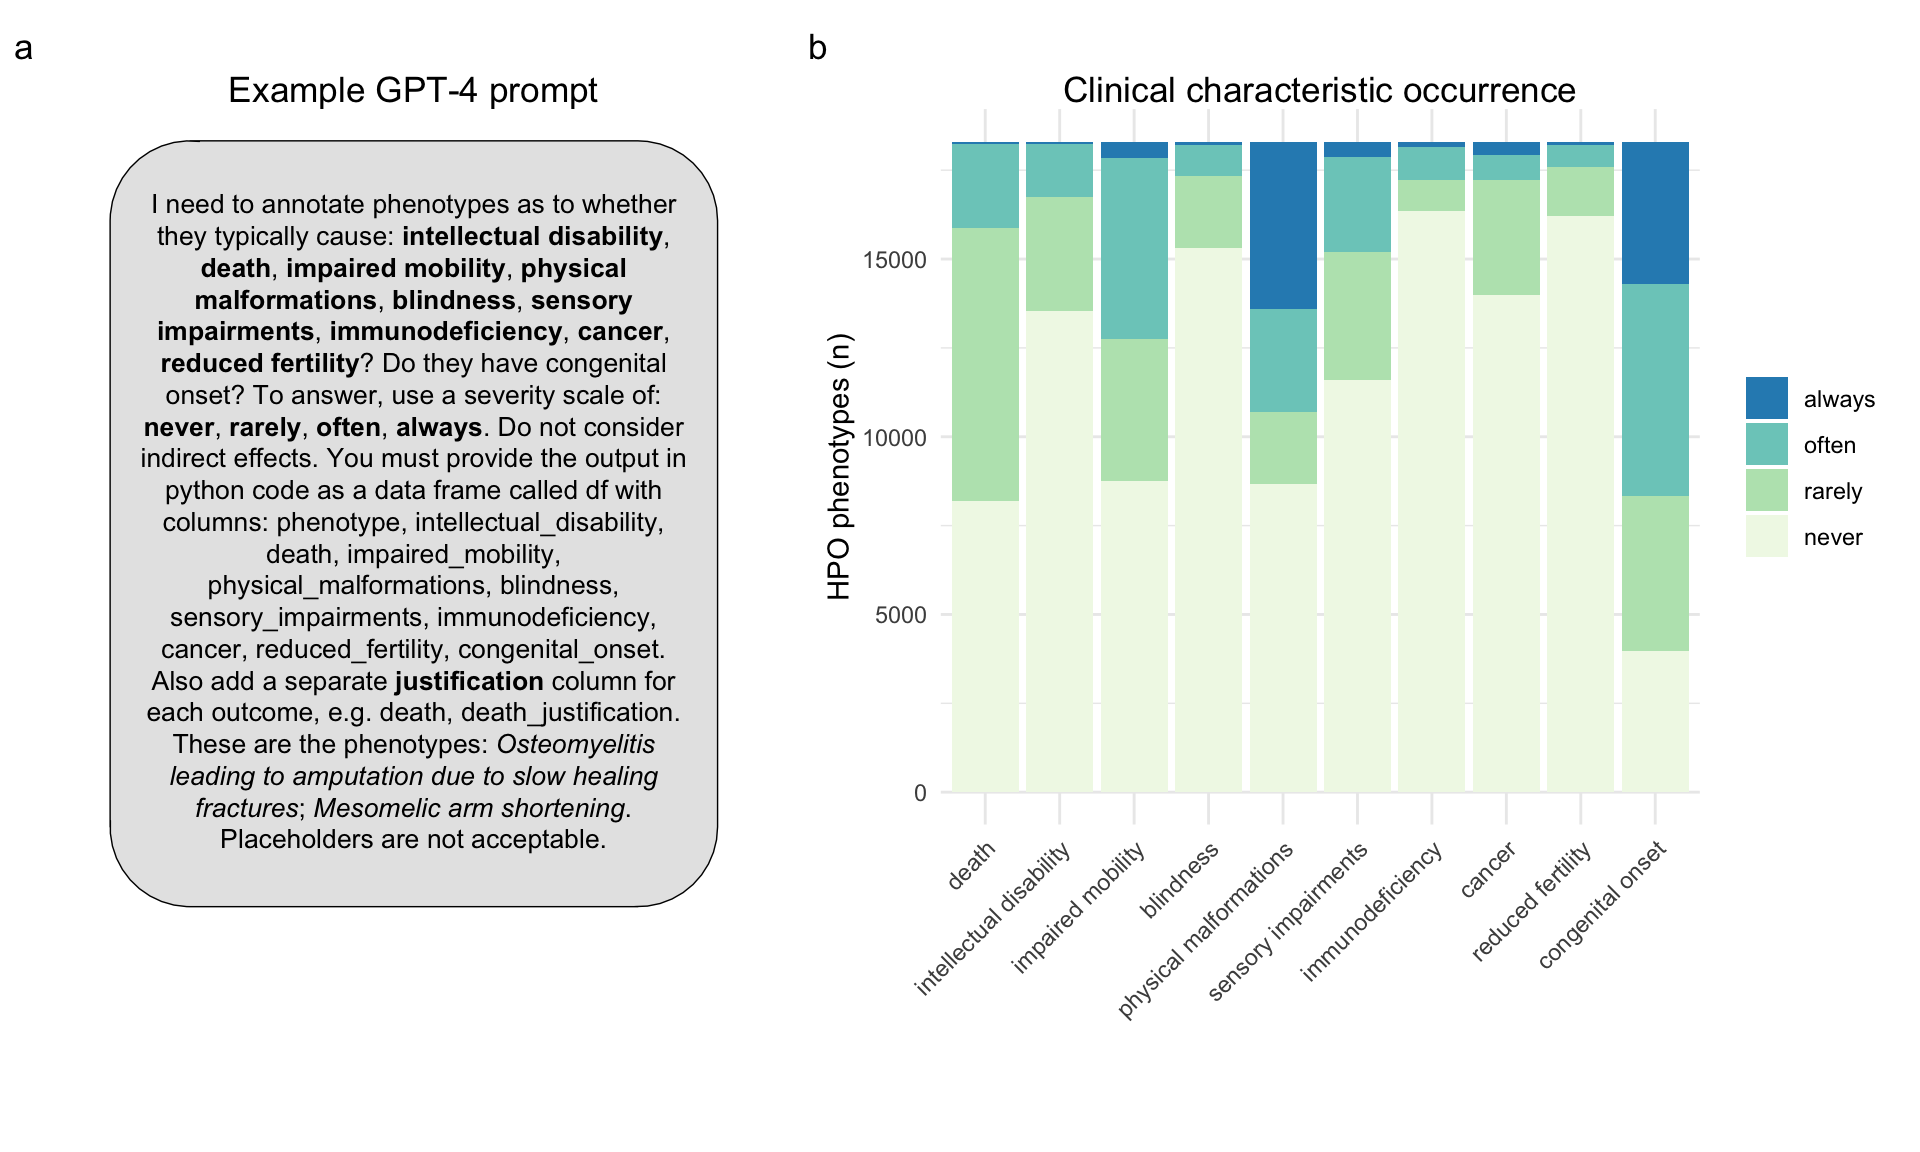

In [ ]:
# subset to clinical characteristics   
occurr_df <- gpt_annot[,c("hpo_name",gsub(" ", "_", annotation_order)),with=FALSE]
cols_of_interest <- names(occurr_df)[-1]
# Create an empty dataframe to store the counts
count_df <- data.frame(matrix(0, nrow = length(cols_of_interest), ncol = 4))
colnames(count_df) <- c("always", "often", "rarely", "never")
rownames(count_df) <- cols_of_interest

## Loop through each column of interest and count the occurrences of:
## 'always', 'often', 'rarely', 'never'
for (col in cols_of_interest) {
  counts <- table(occurr_df[[col]])
  count_df[col, ] <- counts[match(colnames(count_df), names(counts))]
}

count_df_long <- tidyr::gather(count_df,
                               key = "condition",
                               value = "count", 
                               always:never)
count_df_long$category <- rownames(count_df)

count_df_long$category <- gsub("_", " ", count_df_long$category)
count_df_long$condition <- factor(count_df_long$condition, 
                                  levels=c("always", "often", "rarely", "never"))

count_df_long <- count_df_long |>
  dplyr::group_by(category) |>
  dplyr::mutate(percentage = count / sum(count) * 100)

# set annotation order for plots 
count_df_long$category <- factor(count_df_long$category, 
                                 levels = annotation_order)
 

# Load the prompt generation function 
source("code/prompt_gen.R")
prompts <- prompt_gen_table(hpo = hpo)
txt_prompt <- prompts$prompt[1688]
for(x in prompts$terms[[1688]]){
  txt_prompt <- sub(x,paste0("*",x,"*"),txt_prompt)
}
for(x in c(
  eval(formals(prompt_gen_table)$effects),
  eval(formals(prompt_gen_table)$responses),
  "justification")){
  txt_prompt <- sub(x,paste0("**",x,"**"),txt_prompt)
}
## Subplot a: Example prompt
f1a <- ggplot() + 
  labs(title="Example GPT-4 prompt") +
  ggtext::geom_textbox(aes(x=.5,y=.6),
                       box.padding = margin(20, 10, 20, 10),
                       box.margin = margin(0, 0, 0, 0),
                       box.r = grid::unit(30, "pt"),
                       width = unit(.8, "npc"),
                       size=3.5,
                       halign=.5,
                       fill="grey90",
                       label=txt_prompt) +
  ylim(c(0,1)) +
  theme_void() +
  theme(plot.title = element_text(hjust=0.5))

## Subplot b: Stacked bar plot of clinical characteristic occurrence.
f1b <- ggplot(count_df_long, aes(x = category, y = count, fill = condition)) +
  geom_bar(stat = "identity") +
  labs(title = "Clinical characteristic occurrence",
       x = NULL, y = "HPO phenotypes (n)", fill = NULL) +
  theme_minimal() +
  theme(legend.position = "right", 
        plot.title = element_text(hjust=0.5, vjust=-1),  
        axis.text.x = element_text(angle=45, hjust=1),  
        ) +
  scale_fill_brewer(palette = "GnBu", direction = -1)

(
  f1a| 
    (f1b/plot_spacer() ) + plot_layout(heights = c(1, .1))
) + 
  patchwork::plot_layout(widths = c(1,1)) +
  patchwork::plot_annotation(tag_levels = letters) 

We employed the OpenAI GPT-4 model with Python to annotate 17502 terms within the HPO (v2024-02-08) \[@kohlerHumanPhenotypeOntology2021; @garganoHumanPhenotypeOntology2024\]. Our annotation framework was developed based on previously defined criteria for classifying disease severity \[@Lazarin2014-rz\]. We sought to evaluate the impact of phenotypes on factors including intellectual disability, death, impaired mobility, physical malformations, blindness, sensory impairments, immunodeficiency, cancer, reduced fertility, and congenital onset. Through prompt design we found that the performance of GPT-4 improved when we incorporated a scale associated with each effect and required a justification for each response. For each effect, we asked about the frequency of its occurrence - whether it never, rarely, often, or always occurred. Framing the queries in this way served two purposes. First, this helped to constrain the responses of GPT-4 to a specific range of values, making answers more consistent and amenable to downstream data analysis. Second, it served to overcome one of the main limitations noted by @Lazarin2014-rz as they did not collect information on how the frequency of each disease affected their decision making when generating severity annotations.

In [ ]:
never_thresh <- 50
never_dt <- subset(count_df_long, condition=="never" & percentage>=never_thresh)
always_death <- gpt_annot[,list(always_death=all(death=="always"),
                                hpo_name=hpo_name[1]),
                          by="hpo_id"][always_death==TRUE,]

Phenotype outcome occurrence varied across annotation categories. \>50% of phenotypes never caused blindness, sensory impairments, immunodeficiency, cancer, reduced fertility or intellectual disability. Only a minority of phenotypes (21.7%) never had a congenital onset, which is expected as rare disorders tend to be early onset genetic conditions \[Fig. @fig-occurrence\].

Less than 1% of phenotypes always directly resulted in death (n=71), such as ‘Stillbirth’, ‘Anencephaly’ and ‘Bilateral lung agenesis’. Meanwhile, 9707 phenotypes were annotated as often or rarely causing death. 7880 phenotypes were annotated as never causing death. Examples of phenotypes that never cause death included 34 unique forms of syndactyly, a non-lethal condition that causes fused or webbed fingers (occurring 1 in 1,200–15,000 live births). While not life-threatening itself, syndactyly is a symptom of genetic disorders that can cause life-threatening cardiovascular and neurodevelopmental defects, such as Apert Syndrome \[@garagnaniSyndromesAssociatedSyndactyly2013\]. This example highlights the ability of GPT-4 to successfully distinguish between phenotypes that directly cause lethality, and those that are often associated with diseases that cause lethality.

### Annotation consistency and recall

In [ ]:
consist <- checks$annot_stringent_mean
consist <- HPOExplorer::add_hpo_id(consist, hpo = hpo)

Translating ontology terms to ids.

Getting absolute ontology level for 17,548 IDs.

To assess annotation consistency, we queried GPT-4 with a subset of the HPO phenotypes multiple times (n=793 unique phenotypes). We employed two different metrics to determine the *consistency rate*. The first, less stringent metric, defined consistency as the duplicate annotations being either ‘always’ and ‘often’, or ‘never’ and ‘rarely’. The second, more stringent metric, required exact agreement in annotation occurrences, e.g. ‘always’ and ‘always’. For the less stringent metric, duplicated phenotypes were annotated consistently at a rate of at least 80%, and for the more stringent metric, the lowest consistency rate was 57% for congenital onset. An example of where annotations were inconsistent was for the HPO term ‘Acute leukaemia’. One time, GPT-4 annotated it as often causing impaired mobility, giving the justification that ‘weakness and fatigue from leukaemia and its treatment can impair mobility’. The other time, GPT-4 annotated it as rarely causing impaired mobility, giving the justification that ‘acute leukaemia rarely impairs mobility directly’. Despite specifying in the prompt for GPT-4 not to take into consideration indirect effects, this is an example of where it failed to do so.

We also reasoned that GPT-4 would be better able to give consistent answers for more specific phenotypes lower in the ontology, as they are more likely to have a single cause. We found that the stringent consistency rate did indeed significantly improve with greater HPO ontology depth ($X_{Pearson}^2$=22.17, $\hat{V}_{Cramer}$=0.03, p=0.05). See @fig-consist-vs-ontLvl for a visual representation of this relationship.

In [ ]:
# Define items to be checked
items <- c("consistency_count", "consistency_rate",
           "consistency_stringent_count", "consistency_stringent_rate",
           "true_pos_count", "true_pos_rate")
metric_types <- c("Rate", "Count")[1]

# Get data frame with checks values
check_df <- lapply(checks[items], data.table::as.data.table, keep.rownames = TRUE) |>
  data.table::rbindlist(idcol = "metric") |>
  data.table::setnames(c("metric", "annotation", "value"))

check_df$metric <- factor(check_df$metric,
                          levels = items,
                          ordered = TRUE)

check_df$annotation <- factor(check_df$annotation,
                              levels = unique(check_df$annotation),
                              ordered = TRUE)

check_df[, metric_type := ifelse(grepl("count", metric),
                                 "Count", ifelse(grepl("rate", metric), "Rate", NA))]

check_df[, metric_category := gsub("_count|_rate", "", metric)]

check_df$metric_type <- factor(check_df$metric_type, ordered = TRUE)

check_df <- check_df[annotation != "pheno_count"]

check_df[, n := value[metric_type == "Count"],
         by = c("metric_category", "annotation")]

check_df$annotation <- gsub("_", " ", check_df$annotation)
annotation_order <- unique(check_df$annotation)
check_df$annotation <- factor(check_df$annotation, levels = annotation_order)
check_df$metric_category <- gsub("_", " ", check_df$metric_category)
check_df[metric_category=="consistency",metric_category:="consistency lenient"]

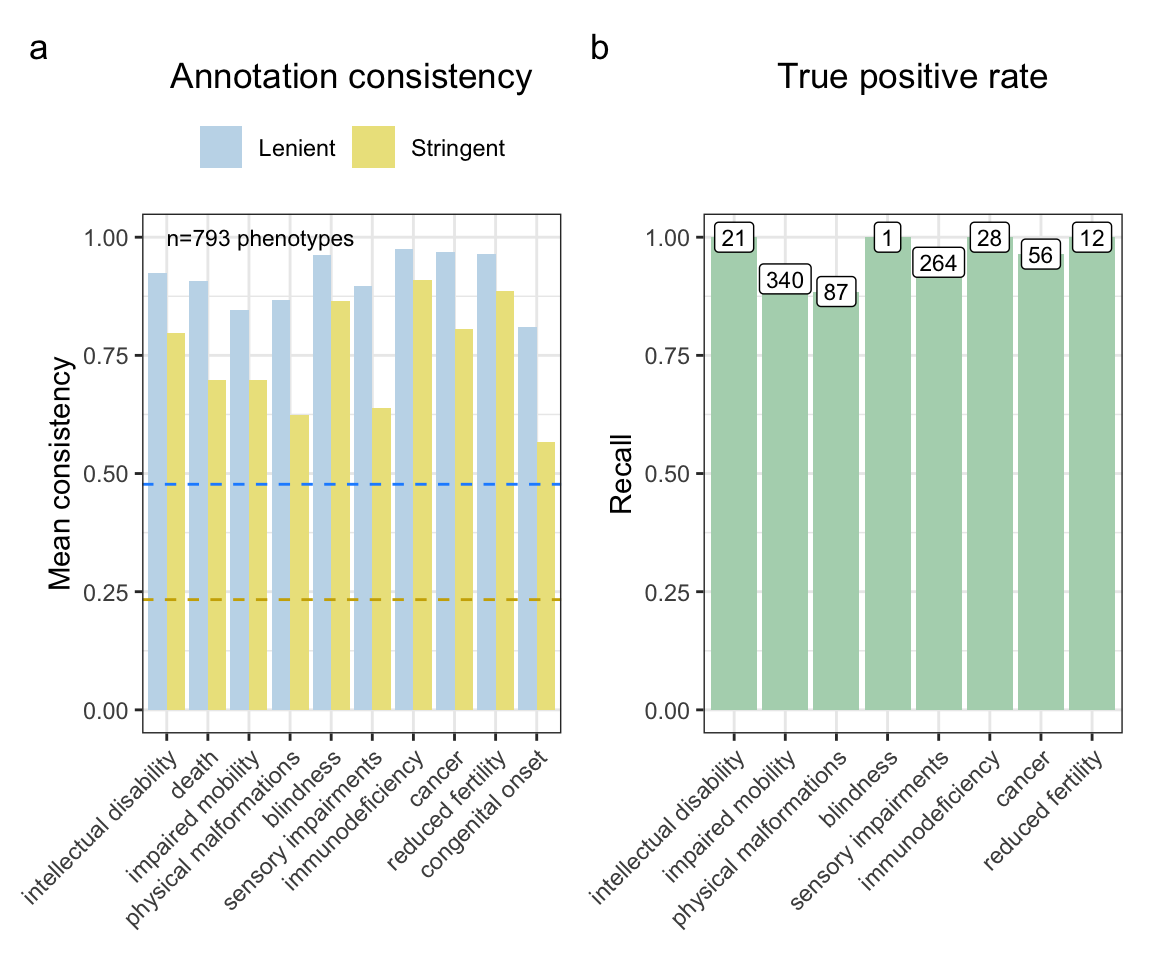

In [ ]:
lab_size <- 3
consistency_plot <- ggplot(check_df[metric_type %in% metric_types &
                                    grepl("consistency",metric_category)],
                           aes(x = annotation, y = value,
                               fill = stringr::str_to_sentence(
                                 gsub("consistency ", "", metric_category)
                                 ),
                               label = round(value, 2))) +
  geom_bar(stat = "identity",position = "dodge") +
  labs(title="Annotation consistency",
       x = NULL, y = "Mean consistency", 
       fill=NULL) +
  scale_fill_manual(values = c("#C3DAEAFF", "#ECE28BFF")) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "top", 
        strip.background = element_rect(fill="white"),
        plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(x = 1, y = 1, label = paste0("n=",n," phenotypes")),
            size=lab_size,
            check_overlap=TRUE, hjust=0) +
  ## Compute the empirical probability of annotations being consistent by chance 
  ## with 2 options and N duplicates
  geom_hline(yintercept = mean(1/2^checks$annot$pheno_count), 
             color="dodgerblue", linetype="dashed")+
  ## Compute the empirical probability of annotations being consistent by chance 
  ## with 4 options and N duplicates
  geom_hline(yintercept = mean(1/4^checks$annot$pheno_count), 
             color="gold3", linetype="dashed")

recall_plot <- ggplot(check_df[metric_type %in% metric_types &
                               metric_category %in% c("true pos"), ],
                        aes(x = annotation, y = value,
                            fill = metric_category,
                            label = n#paste0("n\n=\n",n)
                        )
                      ) +
  geom_bar(stat = "identity", show.legend = TRUE) +
  theme_bw() +
  labs(x = NULL, y = "Recall") +
  ggtitle("True positive rate") +
  scale_fill_manual(values = c("#B1D5BBFF")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none", 
        plot.title = element_text(hjust = 0.5)) +
  geom_label(fill = alpha("white",1),
            size = lab_size)

consistency_plot + recall_plot + 
  plot_layout(widths = c(1, 1)) +
  plot_annotation(tag_levels = 'a')

In order to evaluate the validity of the annotations, we calculated a true positive rate. This involved identifying specific branches within the HPO that would contain phenotypes that would reliably indicate the presence of certain conditions. For instance, the phenotypes ‘Decreased fertility in females’ and ‘Decreased fertility in males’ should often or always cause reduced fertility. We observed an encouraging true positive rate exceeding 88% across in every clinical characteristic and achieving perfect recall (100%) in 4/8 characteristics.

In [ ]:
lowest_recall <- names(checks$true_pos_rate)[checks$true_pos_rate==min(checks$true_pos_rate)]
lowest_recall_dt <- checks$annot[get(lowest_recall)=="never" & hpo_id %in% query_hits[[lowest_recall]]]

The lowest true positive rate was observed for physical malformations, with 88.5% recall across 87 HPO phenotypes. Some cases in which the GPT-4 annotations disagreed with the HPO ground truth included: ‘Angioma serpentinum’, ‘Nevus anemicus’, ‘Pulmonary arteriovenous fistulas’. In the case of ‘Angioma serpentinum’ it provided the justification that ‘No known association with physical malformations’. In another instance, GPT-4 noted that ‘Nevus anemicus’ is ‘Limited to hypopigmented skin patch; no other malformations.’. This indicates that while technically incorrect according to our predefined benchmarks, a case could in fact be made that mild skin conditions do not rise to the level of physical malformations.

This high level of recall underscores the robustness of our annotations and the reliability of the HPO framework in capturing clinically relevant phenotypic information. However, we acknowledge that the number of testable true positive phenotypes for some of these categories are low, especially ‘blindness’ for which there is only 1 phenotype in the HPO (after excluding terms pertaining to colour or night blindness). Furthermore, some of the true positive phenotypes are lexically similar to the name of the clinical characteristic itself. In these cases, annotating ‘Severe intellectual disability’ as always causing intellectual disability is a relatively trivial task. Nevertheless, even these scenarios provide a clear and interpretable benchmark for the model’s performance. In addition, were numerous phenotypes with lexically non-obvious relationships to the clinical characteristic that were annotated correctly by GPT-4. For example, ‘Molar tooth sign on MRI’ (a neurodevelopmental pathology observed in radiological scans) was correctly annotated as causing intellectual disability.

### Quantifying phenotypic severity

In [ ]:
anenceph_dt <- res_coded$annot_weighted[hpo_name=='Anencephaly',]

While individual annotations are informative, we wanted to be able to distil the severity of each phenotype into a single score. Quantifying the overall severity of phenotypes can have important implications for diagnosis, prognosis, and treatment. It may also guide the prioritisation of gene therapy trials for phenotypes with the most severe outcomes and thus the most urgent need. Importantly, the values reflected the severity of each outcome based on both the type of outcome itself and its frequency within a particular phenotype. For instance, a phenotype always causing death would have a higher multiplied value than a phenotype often causing reduced fertility (see @tbl-metric-weights). First, we created a dictionary to map each phenotype outcome (e.g. blindness) and its frequency (always, often, rarely, never) to numeric values from 0-3. Then, the phenotype outcome values were multiplied by phenotype outcome weights. Next, we computed an average score for each phenotype by aggregating the multiplied values across all phenotype outcomes and then calculating the mean. This was then normalised by the theoretical maximum severity score, so that all phenotypes were on a 0-100 severity scale (where 100 is the most severe phenotype possible). This average normalised score represents the overall severity of the phenotype based on the severity of its individual outcomes.

Based on these scores we evaluated the top 50 severe phenotypes. One of the most severe phenotype was ‘Anencephaly’ (HP:0002323) with a composite severity score of 45. Anencephaly is a birth defect where the baby is born without a portion of its brain and skull, often these babies are stillborn. In fact, many of the most severe phenotypes were related to developmental brain and neural tube defects. Comparison of the severity scores for each response, across the phenotype outcomes annotated, revealed consistent trends: as the response of the phenotype outcome increased (from never to always), the severity score also increased (\[Supplementary Fig. @fig-severity-boxplot\]). We also evaluated the severity score distribution by HPO branch and calculated the mean severity score using all phenotypes within each major HPO branch (\[Fig. @fig-severity-histo\]). The HPO branch with the greatest mean severity score was ‘Abnormal cellular phenotype’ (mean=17), followed by ‘Neoplasm’ (mean=15.2), which would include the highly ranked phenotypes seen in @fig-top-phenos.

Adding level-2 ancestor to each HPO ID.

Adding ancestor metadata.

Ancestor metadata already present. Use force_new=TRUE to overwrite.

Translating ontology terms to ids.

Keeping descendants of 1 term(s).

17,958 terms remain after filtering.

166,510 associations remain after filtering.

Getting absolute ontology level for 18,536 IDs.

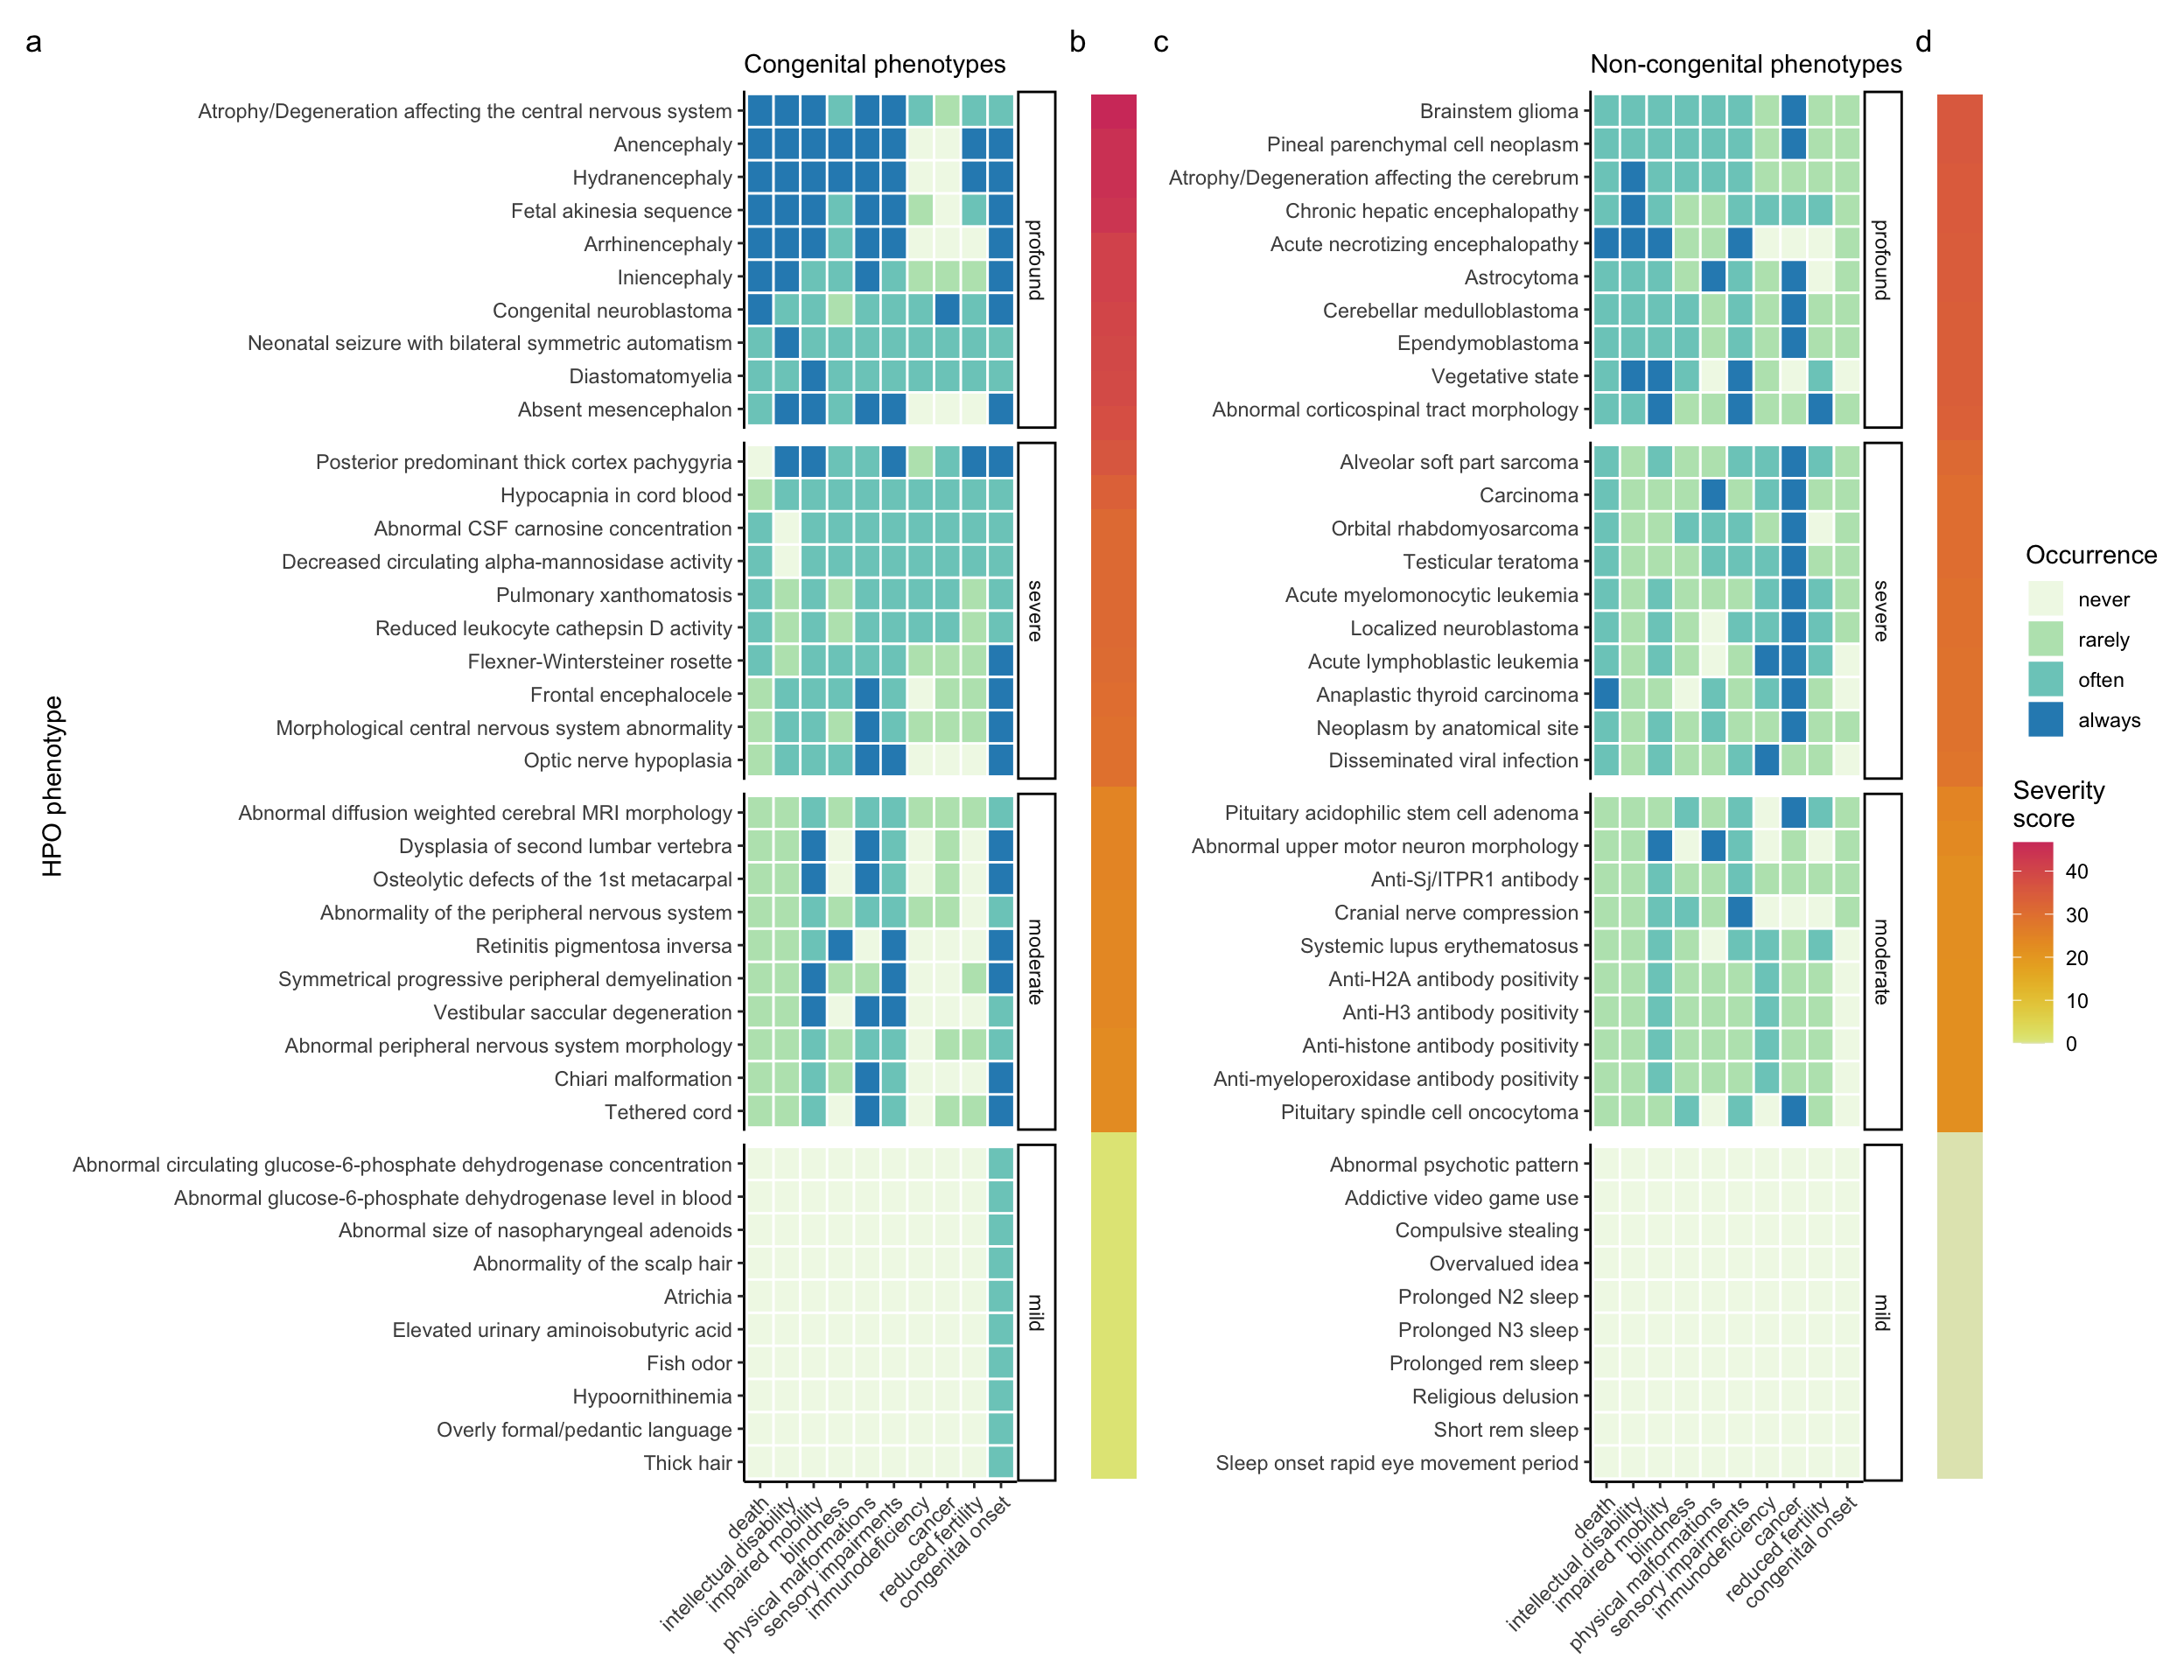

In [ ]:
plot_top_phenos_out <- HPOExplorer::plot_top_phenos(res_class = res_class)

### Severity classes

While the continuous severity score is a helpful metric, there may be some use cases where a categorical classification of severity is more immediately useful. In work by @Lazarin2014-rz, the authors defined severity classed using a simple decision tree based on the individual severity annotations. We approximated this approach using our GPT-4 annotations. This categorical approach showed a strong degree of positive correspondence with the continuous severity score ($\hat{\omega_{p}^2}$=0.88, p\<2.2e-308). In other words, severity score increased with severity class level (mild \< moderate \< severe \< profound) as expected. The distribution of severity classes is shown in @fig-severity-class.

### Correlations between severity metrics

In [ ]:
cor_metrics <- Hmisc::rcorr(as.matrix(res_coded$annot_weighted[,-c("hpo_id","hpo_name")]))
cor_composite <- sort(cor_metrics$r["severity_score_gpt",], decreasing = TRUE)[-1]

We found that some severity metrics were correlated with one another, with a mean Pearson correlation of 0.2 across all individual metrics (see @fig-metric-corplot). In particular, blindness and sensory impairment were highly correlated with one another (r=0.62, p=0). Some metrics drove the composite severity score more than other, which is a reflection of both our per-metric weighting scheme, response type frequencies, and the correlation structure between metrics. Overall, impaired mobility seemed to be the strongest driver of the composite severity score with a Pearson correlation of 0.6001824, followed by intellectual disability (r=0.59) and death (r=0.56).

In [ ]:
### Correlation with QALY
ihme <- data.table::fread("~/Downloads/IHME-GBD_2019_DATA-e678e00e-1/IHME-GBD_2019_DATA-e678e00e-1.csv")
ihme[,nm:=tolower(cause_name)]

res_coded$annot_weighted[,nm:=tolower(hpo_name)]
ihme_merged <- merge(data.table::dcast.data.table(ihme, 
                             formula = "nm~measure_name+metric_name", 
                             value.var = "val",
                             fun.aggregate = mean, na.rm=TRUE), 
                     res_coded$annot_weighted)
metric_cols <- list(
  IHME=grep(paste(paste0("_",
                         "Percent",
                         # unique(ihme$metric_name)[1],
                         "$"),collapse = "|"),names(ihme_merged), value = TRUE),
  GPT=setdiff(names(res_coded$annot_weighted),c("hpo_id","hpo_name","nm"))
)

Xcor <- cor(ihme_merged[,unlist(metric_cols),with=FALSE], use="complete.obs")
heatmaply::heatmaply(Xcor[metric_cols$IHME,metric_cols$GPT])

### Congenital onset by HPO branch

In [ ]:
gpt_annot_plot_branches_out <- HPOExplorer::gpt_annot_plot_branches(
  gpt_annot = gpt_annot, 
  hpo = hpo, 
  metric = "congenital_onset", 
  fill_lab = "Congenital\nonset", 
  show_plot = FALSE)

Adding level-2 ancestor to each HPO ID.

Adding ancestor metadata.

Ancestor metadata already present. Use force_new=TRUE to overwrite.

17,494 associations remain after filtering.

Getting absolute ontology level for 17,548 IDs.

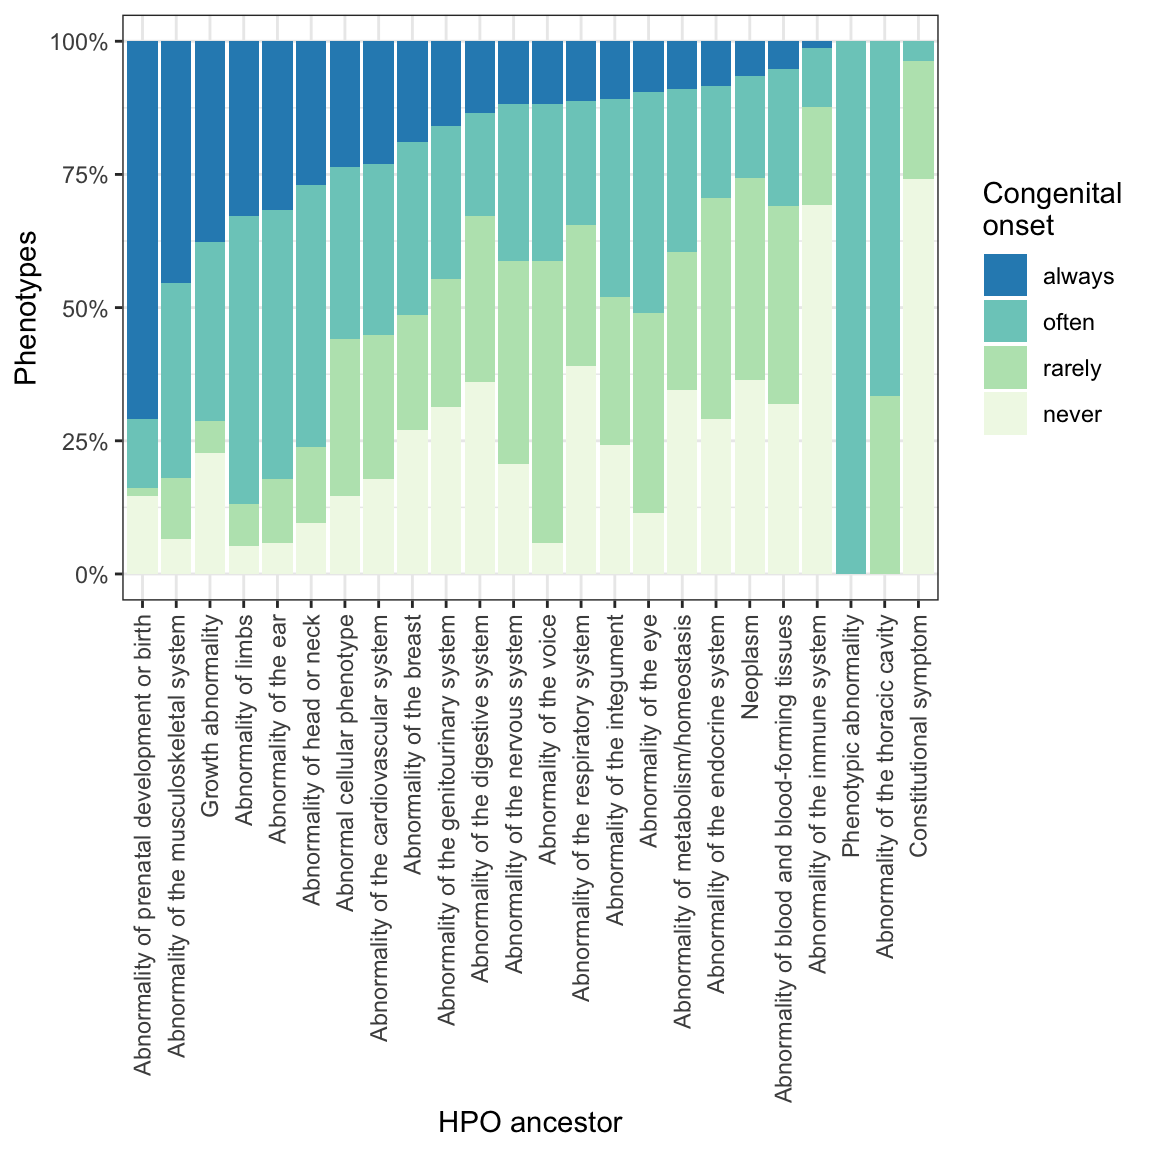

In [ ]:
gpt_annot_plot_branches_out$plot

Next, we assessed the distribution of congenital onset across HPO branches (\[Fig. @fig-congenital-branches\]). We found that the Abnormality of prenatal development or birth branch contained the greatest proportion of phenotypes that were always congenital (70.15%), followed by Abnormality of the musculoskeletal system (45.34%) and Growth abnormality (37.62%). This is concordant with the expectation that these phenotypes should largely be congenital. The HPO branches with the least commonly congenital phenotypes were Constitutional symptom (0%), Abnormality of the thoracic cavity (0%), and Phenotypic abnormality (0%). [‘Constitutional symptom’](https://hpo.jax.org/app/browse/term/HP:0025142) is a fairly broad term defined as *‘A symptom or manifestation indicating a systemic or general effect of a disease and that may affect the general well-being or status of an individual.’* Examples include ‘Fatigue’ ‘Exercise intolerance’, ‘Hot flashes’ and ‘Sneeze’.

## Discussion

Phenotype severity annotations have utility across a wide variety of applications in both the clinic and research. In clinical settings, severity annotations can be used to prioritise the treatment of some phenotypes over others in patients with complex presentations, avoid administering contraindicated drugs, and prognosing potential health outcomes. In research settings, severity annotations can be used to identify phenotypes that have a large impact on patient outcomes and yet are currently understudied. They may also be used to help design new experiments and studies, or even provide new insights into the underlying aetiology of the disease by making expert-level summaries more immediately accessible to the wider research community.

The creation and annotation of biomedical knowledge has traditionally relied on manual or semi-manual curation by human experts \[@putmanMonarchInitiative20242024; @ochoaOpenTargetsPlatform2021; @mungallMonarchInitiativeIntegrative2017a; @kohlerHumanPhenotypeOntology2021; @garganoHumanPhenotypeOntology2024\]. Performing such manual curation and review tasks at scale is often infeasible for human biomedical experts given limited time and resources. LLMs have the capacity to effectively encode, retrieve, and synthesise vast amounts of diverse information in a highly scalable manner \[@vanveenAdaptedLargeLanguage2024; @singhalLargeLanguageModels2023; @openaiGPT4TechnicalReport2024\]. This makes them powerful tools that can be applied in a rapidly expanding variety of scenarios, including medical practice, research and data curation \[@singhalLargeLanguageModels2023; @toroDynamicRetrievalAugmented2023; @panLargeLanguageModels2023; @oneilPhenomicsAssistantInterface2024; @caufieldStructuredPromptInterrogation2023\].

Here, we introduce a novel framework to leverage the current best-in-class LLM, GPT-4 \[@openaiGPT4TechnicalReport2024\], to systematically annotate the severity of 17502 phenotypic abnormalities within the HPO. By employing advanced AI capabilities, we have demonstrated the feasibility of automating this process, significantly enhancing efficiency without substantially compromising accuracy. Our validation approach yielded a high true positive rate exceeding 88% across the phenotypes tested. Furthermore, our approach can be readily adapted and scaled to accommodate the growing volume of phenotypic data. In total, the entire study cost \$296.27 in queries to the OpenAI API. While we do not have a direct comparison, this likely represents a extremely small fraction of the total costs of such a study if performed manually by human experts charging at an hourly rate. Even if all human annotations were provided on a volunteer basis, this would still require hundreds if not thousands of hours of cumulative manual human labour. Using our approach, severity annotations for the entire HPO can be generated automatically in a matter of several hours.

Throughout this study, we observed that GPT-4 was capable of reliably recovering deep semantic relationships from the medical domain, far beyond making superficial inferences based on lexical similarities. An excellent example of this is the phenotype ‘Molar tooth sign on MRI’ (HP:0002419; severity score=25.56), which GPT-4 annotated as causing intellectual disability. At first glance, we ourselves assumed this was a false positive as the term appeared to be related to dentition. However, upon further inspection we realised that molar tooth sign is in fact a pattern of abnormal brain morphology that happens to bear some resemblance to molar dentition when observed in radiological scans. This phenotype is a known sign of neurodevelopmental defects that can indeed cause severe intellectual disability \[@gleesonMolarToothSign2004\].

In addition to rapidly synthesising and summarising vast amounts of information, LLMs can also be steered to provide justifications for each particular response. This makes LLMs amenable to direct interrogation as a means of recovering explainability, especially when designed to retain information about previous requests and interactions as they use these to iteratively improve and update their predictions \[@janikAspectsHumanMemory2024\]. This represents a categorical advance over traditional natural language processing models based on more shallow forms of statistical or machine learning (e.g. Term Frequency-Inverse Document Frequency \[@jonesStatisticalInterpretationTerm1972\], Word2vec \[@mikolovEfficientEstimationWord2013\]) which lack the ability to provide chains of causal reasoning to justify their predictions. This highlights the fundamental trade-off between simpler models with high explainability (the ability humans to understand the inner workings of the model) but low interpretability (the ability of humans to trace the decision process of the model, analogous to human ‘reasoning’), and deeper more complex models with low explainability but high interpretability \[@marcinkevicsInterpretabilityExplainabilityMachine2023\].

A key contribution of our study is the introduction of a quantitative severity scoring system that integrates both the nature of the phenotype outcome and the frequency of its occurrence. By encoding the concept of severity in this way, we are able to prioritise phenotypes based on their impact on patients. The methodology allowed us to transition from low-throughput qualitative assessments of severity (e.g. @Lazarin2014-rz) to high-throughput quantitative assessments of severity. One of the most severe phenotypes in the HPO is ‘Fetal akinesia sequence’ (FAS; HP:0001989, severity score= 43.9), and extremely rare condition that is almost always lethal. FAS is a complex, multi-system phenotype that can be caused by at least 24 different genetic disorders. Despite the complex and heterogeneous aetiology of this phenotype, GPT-4 was able to provide accurate annotations alongside explainable justifications for those annotations (see @tbl-fas). For example, this phenotype almost always results in death, either *in utero* or shortly after birth. Not only did GPT-4 correctly provide the annotation death as ‘always’, when asked whether FAS causes sensory impairments it provided the response ‘always’ with the justification ‘Fetal akinesia sequence typically results in severe sensory impairment due to neurodevelopmental disruption.’ Neurodevelopmental disruption is indeed a hallmark component of FAS (e.g. hydrocephalus, cerebellar hypoplasia) that causes severe impairments across multiple sensory systems \[@chenPrenatalDiagnosisGenetic2012\]. This demonstrates that GPT-4 was able to recover the correct chain of causality from phenotype to clinical outcome.

Our findings highlight the potential of this next generation of natural language processing technologies in significantly contributing to the automation and refinement of data curation in biomedical research. These results have a large number of useful real-world applications, such as prioritising gene therapy candidates \[@murphyIdentificationCellTypespecific2023\] and guiding clinical decision-making in rare diseases. It may also be used as tool to help inform policy decisions and funding allocation by healthcare or governmental institutions. This of course would need to be in consultation with subject matter medical experts, patients, advocates and biomedical ethicists before reaching a final decision. Nevertheless, access to succinct, interpretable, and semi-quantitative severity annotations may encourage key decision makers with limited time to review individual proposals to pay heed to phenotypes and diseases that would otherwise be overlooked. As the HPO and the broader literature continue to grow over time, our automated AI-based approach can easily be repeated to keep pace with the rapidly evolving biomedical landscape. Furthermore, it can be extended to produce different sets of annotations or be used with any other ontology. Additional use cases include gathering data on the prevalence of each phenotype to approximate their social and financial costs.

One key limitation of our study is the fact that we did not explicitly interrogate GPT-4 to assess how the availability of treatments affected the annotations it produced. For example, there are some very severe conditions for which highly effective treatments and early detection screens are widely available (e.g. syphilis, some forms of melanoma), thus rendering them fully treatable or even curable provided access to modern healthcare. It would therefore be useful to further interrogate GPT-4 to uncover how the availability of treatments influences its responses. Many of our findings here seem to indicate that GPT-4 does take into account quality of care to the extent that health services increase the likelihood of desired outcomes. For example, many of the cancer phenotypes are justified as always or often causing death unless detected and treated early in the disease course. On the other hand, some cancers are justified as rarely causing death if appropriate treatment is provided, which may not always be the case for individuals or populations with access to less access to quality healthcare services. Future efforts could more explicitly ask GPT-4 whether the phenotype would cause death with no or suboptimal treatment.

Another limitation with the present dataset is that phenotypes themselves can manifest with different degrees of severity, in the sense that they are more pronounced or intense. For example, sensitivity to light could range from a mild inconvenience to a severe disability that prevents the individual from leaving their home during the day. The effect of onset (beyond congenital vs. non-congenital) and time course (acute, slowly progression, relapse-remitting) were also not explicitly considered. Finally, we did not ask GPT-4 to consider phenotypes as they present within particular diseases. For example, while the phenotype ‘Hypertension’ may be mild to moderate in the general population and not present until middle-age, it can also present early in life as very severe in the context of a rare genetic disorder such as Liddle syndrome. Future work could explore these nuances in more detail.

In addition to these technical challenges, there are multiple factors that need to be considered when trying to prioritise phenotypes for their suitability for gene therapy development. First, while we have attempted to formalise severity here, this is an inherently subjective concept that may vary considerably across different individuals and contexts. For instance, one could ask whether a condition that always causes death is worse than a condition that causes a lifetime of severe disability (e.g. paralysis, blindness, intellectual disability). Metrics such as quality-adjusted life years (QALYs) have been proposed in the past to address these dilemmas by defining health as a function of both the length and quality of life \[@prietoProblemsSolutionsCalculating2003\]. With regards to the financial burden of diseases, in some situations phenotypes which require many years of expensive medical care may be prioritised over those that result in extremely early onset lethality and little opportunity for therapeutic intervention. Another factor that affects the viability of a therapeutic program is the speed, cost and other practical considerations of a clinical trial. For instance, measuring risk of ageing-related respiratory failure over a ten-year period may be impractical in some cases. However, testing for total reversal of an existing severe phenotype could potentially yield faster and more immediately impactful results. If performed in close collaboration with medical ethicists, governmental organisations, advocacy groups and patient families, such cost/benefit assessments could be aided by LLMs through the scalable gathering of relevant data. As AI capabilities continue to advance, the range of applications in which they can be used effectively will continue to grow.

While our study demonstrates the feasibility and utility of AI-driven phenotypic annotation, several limitations must be acknowledged. The reliance on computational algorithms may introduce biases or inaccuracies inherent to the training data, necessitating ongoing validation and refinement of our approach. Additionally, our severity scoring system, while comprehensive, may not capture the full spectrum of phenotypic variability or account for complex gene-environment interactions. Future research should focus on further optimising AI-driven annotation methodologies, incorporating additional data modalities such as genomic and clinical data to enhance accuracy.

In conclusion, our study represents a significant step towards harnessing the power of AI to advance phenotypic annotation and severity assessment across all rare diseases. This resource aims to provide researchers and clinicians with actionable insights that can inform rare disease research and improve the lives of individuals affected by rare diseases.

## Methods

### Annotating the HPO using OpenAI GPT-4

We wrote a Python script to iteratively query GPT-4 via the OpenAI application programming interface (API). The ultimately yielded consistently formatted annotations for 17502 terms within the HPO. Our annotation framework was developed based on previously defined criteria for classifying disease severity \[@Lazarin2014-rz\]. We sought to evaluate whether each phenotype directly caused a given severity-related clinical characteristic, including: intellectual disability, death, impaired mobility, physical malformations, blindness, sensory impairments, immunodeficiency, cancer, reduced fertility, and/or had a congenital onset. Through prompt engineering we found that the performance of GPT-4 improved when we incorporated a scale associated with each effect and required a justification for each response. We asked how frequently the given phenotype directly causes each clinical characteristic - whether it never, rarely, often, or always occurred. This design helps to constrain the potential responses of GPT-4 and thus make it more amenable to machine-readable post-processing. It also serves to address one of its key limitations from the @Lazarin2014-rz survey, namely the lack information on how clinical characteristic frequency affected the clinicians’ severity annotations. Here, we can instead use the frequency values to generate more precise annotations and downstream severity ranking scores.

Furthermore, our prompt design revealed that the optimal trade-off between the number of phenotypes and performance (in terms of producing the desired annotations, and adhering to the formatting requirements) was achieved when inputting no more than two or three phenotypes per prompt. An example prompt can be seen in @fig-occurrence. Thus, only two phenotypes were included per prompt in order to 1) avoid exceeding per-query token limits, and 2) prevent the breakdown of GPT-4 performance due to long-form text input, which is presently a known limitation common to many LLMs including GPT-4 \[@weiLongformFactualityLarge2024\].

### Calculating the true positive rate

In [ ]:
queries <- eval(formals(HPOExplorer::search_hpo)$queries)
query_hits_dt <- data.table(
  "Clinical characteristic"=stringr::str_to_sentence(gsub("_"," ",names(queries))),
  "HPO queries"=trimws(gsub("^","",
                            sapply(queries, function(x){paste(shQuote(x),collapse="; ")}), 
                            fixed = TRUE)),
  "True positive HPO IDs"=sapply(query_hits[names(queries)], data.table::uniqueN)
)
knitr::kable(as.data.frame(query_hits_dt))

  ------------------------------------------------------------------------
  Clinical characteristic      HPO queries                   True positive
                                                                   HPO IDs
  ---------------------------- ---------------------------- --------------
  Intellectual disability      'Intellectual disability';               19
                               'Mental deterioration'       

  Impaired mobility            'Gait disturbance';                     319
                               'Diminished movement'; '     
                               mobility'                    

  Physical malformations       'malformation'                           78

  Blindness                    'blindness'                               1

  Sensory impairments          'Abnormality of vision';                252
                               'Abnormality of the sense of 
                               smell'; 'Abnormality of      
                               taste sensation'; 'Somatic   
                               sensory dysfunction';        
                               'Hearing abnormality'        

  Immunodeficiency             'Immunodeficiency';                      29
                               'Impaired antigen-specific   
                               response'                    

  Cancer                       'Cancer'; 'malignant';                   56
                               'carcinoma'                  

  Reduced fertility            'Decreased fertility';                    9
                               'Hypogonadism'               
  ------------------------------------------------------------------------


A true positive rate was calculated as a measure of the recall of the GPT-4 annotations. This was achieved by identifying specific branches within the HPO that would contain phenotypes that would reliably indicate the occurrence of certain clinical characteristics, and using all descendants of this HPO branch as true positives. For example, all descendants of the terms ‘Intellectual disability’ (HP:0001249) or ‘Mental deterioration’ (HP:0001268) should be annotated as always or often causing intellectual disability (@tbl-true-positives).

### Quantifying phenotypic severity

The GPT-4 generated annotation occurrences were converted into a semi-quantitative scoring system, with ‘always’ corresponding to 3, ‘often’ to 2, ‘rarely’ to 1, and ‘never’ to 0. These scores were then weighted by a severity metric on a scale of 1-5, with 5 representing the highest severity, as determined by the provided annotations (@tbl-metric-weights). Subsequently, the weighted scores underwent normalisation to yield a final quantitative severity score ranging from 0-100, with 100 signifying the maximum severity score attainable.

Let us denote:

-   $p$ : a phenotype in the HPO.

-   $j$ : the identity of a given annotation metric (i.e. clinical characteristic, such as ‘intellectual disability’ or ‘congenital onset’).

-   $W_j$: the assigned weight of metric $j$.

-   $F_j$: the maximum possible value for metric $j$ (equivalent across all $j$).

-   $F_{pj}$ : the numerically encoded value of annotation metric $j$ for phenotype $p$.

-   $NSS_p$: the final composite severity score for phenotype $p$ after applying normalisation to align values to a 0-100 scale and ensure equivalent meaning regardless of which other phenotypes are being analysed in addition to $p$. This allows for direct comparability of severity scores across studies with different sets of phenotypes.

In [ ]:
## Get weights from HPOExplorer::gpt_annot_codify function defaults
args <- formals(HPOExplorer::gpt_annot_codify)
code_dict <- eval(args$code_dict)|>sort(decreasing = TRUE)
names(code_dict) <- paste0(stringr::str_to_sentence(names(code_dict)),
                           " (",code_dict,")")
weights_dict <- eval(args$weights_dict)|>unlist()|>sort(decreasing = TRUE)
names(weights_dict) <- paste0(stringr::str_to_sentence(gsub("_"," ",names(weights_dict))),
                           " (",weights_dict,")")
## Create the outer product of the two weight vectors
tbl_metric_weights <- as.data.table(outer(weights_dict,code_dict, "*"),
                                    keep.rownames = "Clinical characteristic")

knitr::kable(as.data.frame(tbl_metric_weights))

  --------------------------------------------------------------------------
  Clinical characteristic       Always (3)  Often (2)  Rarely (1)  Never (0)
  ---------------------------- ----------- ---------- ----------- ----------
  Death (6)                             18         12           6          0

  Intellectual disability (5)           15         10           5          0

  Impaired mobility (4)                 12          8           4          0

  Blindness (4)                         12          8           4          0

  Physical malformations (3)             9          6           3          0

  Sensory impairments (3)                9          6           3          0

  Immunodeficiency (3)                   9          6           3          0

  Cancer (3)                             9          6           3          0

  Reduced fertility (1)                  3          2           1          0

  Congenital onset (1)                   3          2           1          0
  --------------------------------------------------------------------------


### Severity classes

In [ ]:
tiers_dict <- unlist(eval(formals(HPOExplorer::gpt_annot_class)$tiers_dict))

The decision tree algorithm used in @Lazarin2014-rz was adapted here for use with the GPT-4 annotations. This algorithm first assigned each annotation metric to a tier, where Tier 1 indicated the most severe annotation metrics and Tier 4 indicated the least severe annotation metrics (‘death’=1, ‘intellectual disability’=1, ‘impaired mobility’=2, ‘physical malformations’=2, ‘blindness’=3, ‘sensory impairments’=3, ‘immunodeficiency’=3, ‘cancer’=3, ‘reduced fertility’=4). If a phenotype often or always caused more than one Tier 1 annotation, it was assigned a severity class of “Profound”. If the phenotype often or always caused only one Tier 1 annotation, it was assigned a severity class of “Severe”. A “Severe” class assignment was also assigned if the phenotype often or always caused three or more Tier 2 and Tier3 annotations. If the phenotype often or always caused at least one Tier 2 annotation, it was assigned a severity class of “Moderate”. All remaining phenotypes were was assigned a severity class of “Mild”. In cases where the phenotype mapped to more than one class, only the most severe class was used. This procedure is implemented within the function `HPOExplorer::gpt_annot_class`.

### Correlations between severity metrics

To assess the correlation structure between each severity metric, as well as between the composite severity score and each metric, we computed Pearson correlation coefficients for all pairwise combinations of these variables using the numerically encoded metric values. The correlation matrix was visualised using a heatmap, with the colour intensity representing the strength of the correlation (@fig-metric-corplot).

## Data and code availability statement

All code and data used in this study are available on GitHub at:

<https://github.com/neurogenomics/gpt_hpo_annotations>

The GPT-4 annotations for all HPO phenotypes are made available through the R function `HPOExplorer::gpt_annot_read` or in CSV format at:

<https://github.com/neurogenomics/gpt_hpo_annotations/tree/master/data>

A fully reproducible version of this Quarto manuscript can be found at:

<https://github.com/neurogenomics/gpt_hpo_annotations/blob/master/manuscript.qmd>

## Acknowledgements

We would like to thank members of the Monarch Initiative for their insight and feedback throughout this project. In particular, Peter Robinson.

### Funding

This work was supported by a UK Dementia Research Institute (UK DRI) Future Leaders Fellowship \[MR/T04327X/1\] and the UK DRI which receives its funding from UK DRI Ltd, funded by the UK Medical Research Council, Alzheimer’s Society and Alzheimer’s Research UK.

## References



## Supplementary Materials

### Supplementary Figures

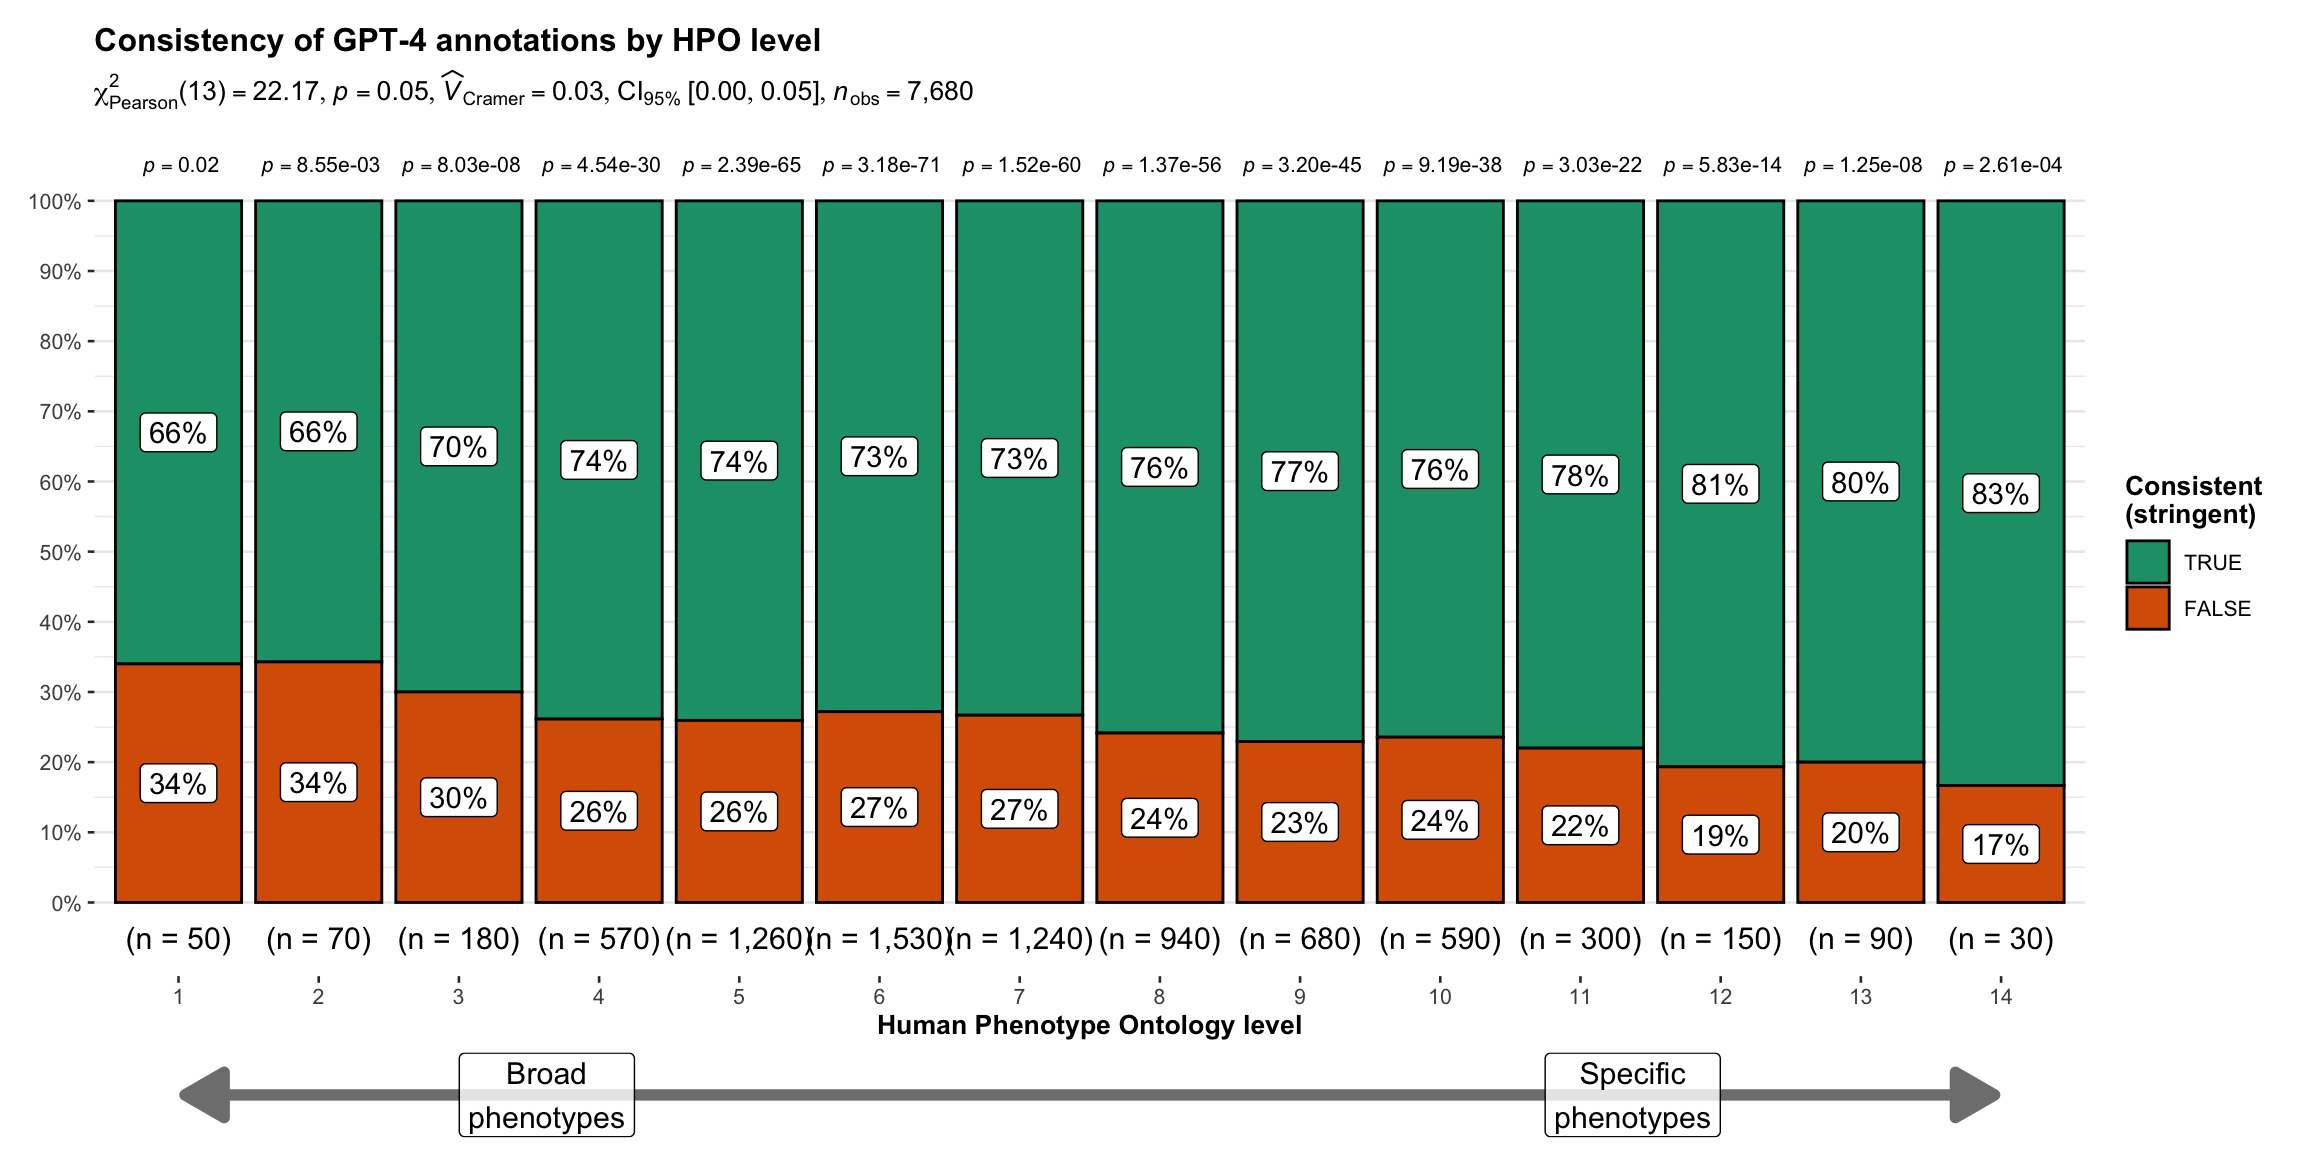

In [ ]:
consist_vs_ontLvl$labels$caption <- NULL
(
consist_vs_ontLvl /
HPOExplorer::plot_arrow(x=0,xend=1, y=1, yend=1, labels_x=c(.8,.2), labels_y=c(1,1), 
labels=c("Specific\nphenotypes","Broad\nphenotypes"))
) + patchwork::plot_layout(heights = c(1, 0.1))

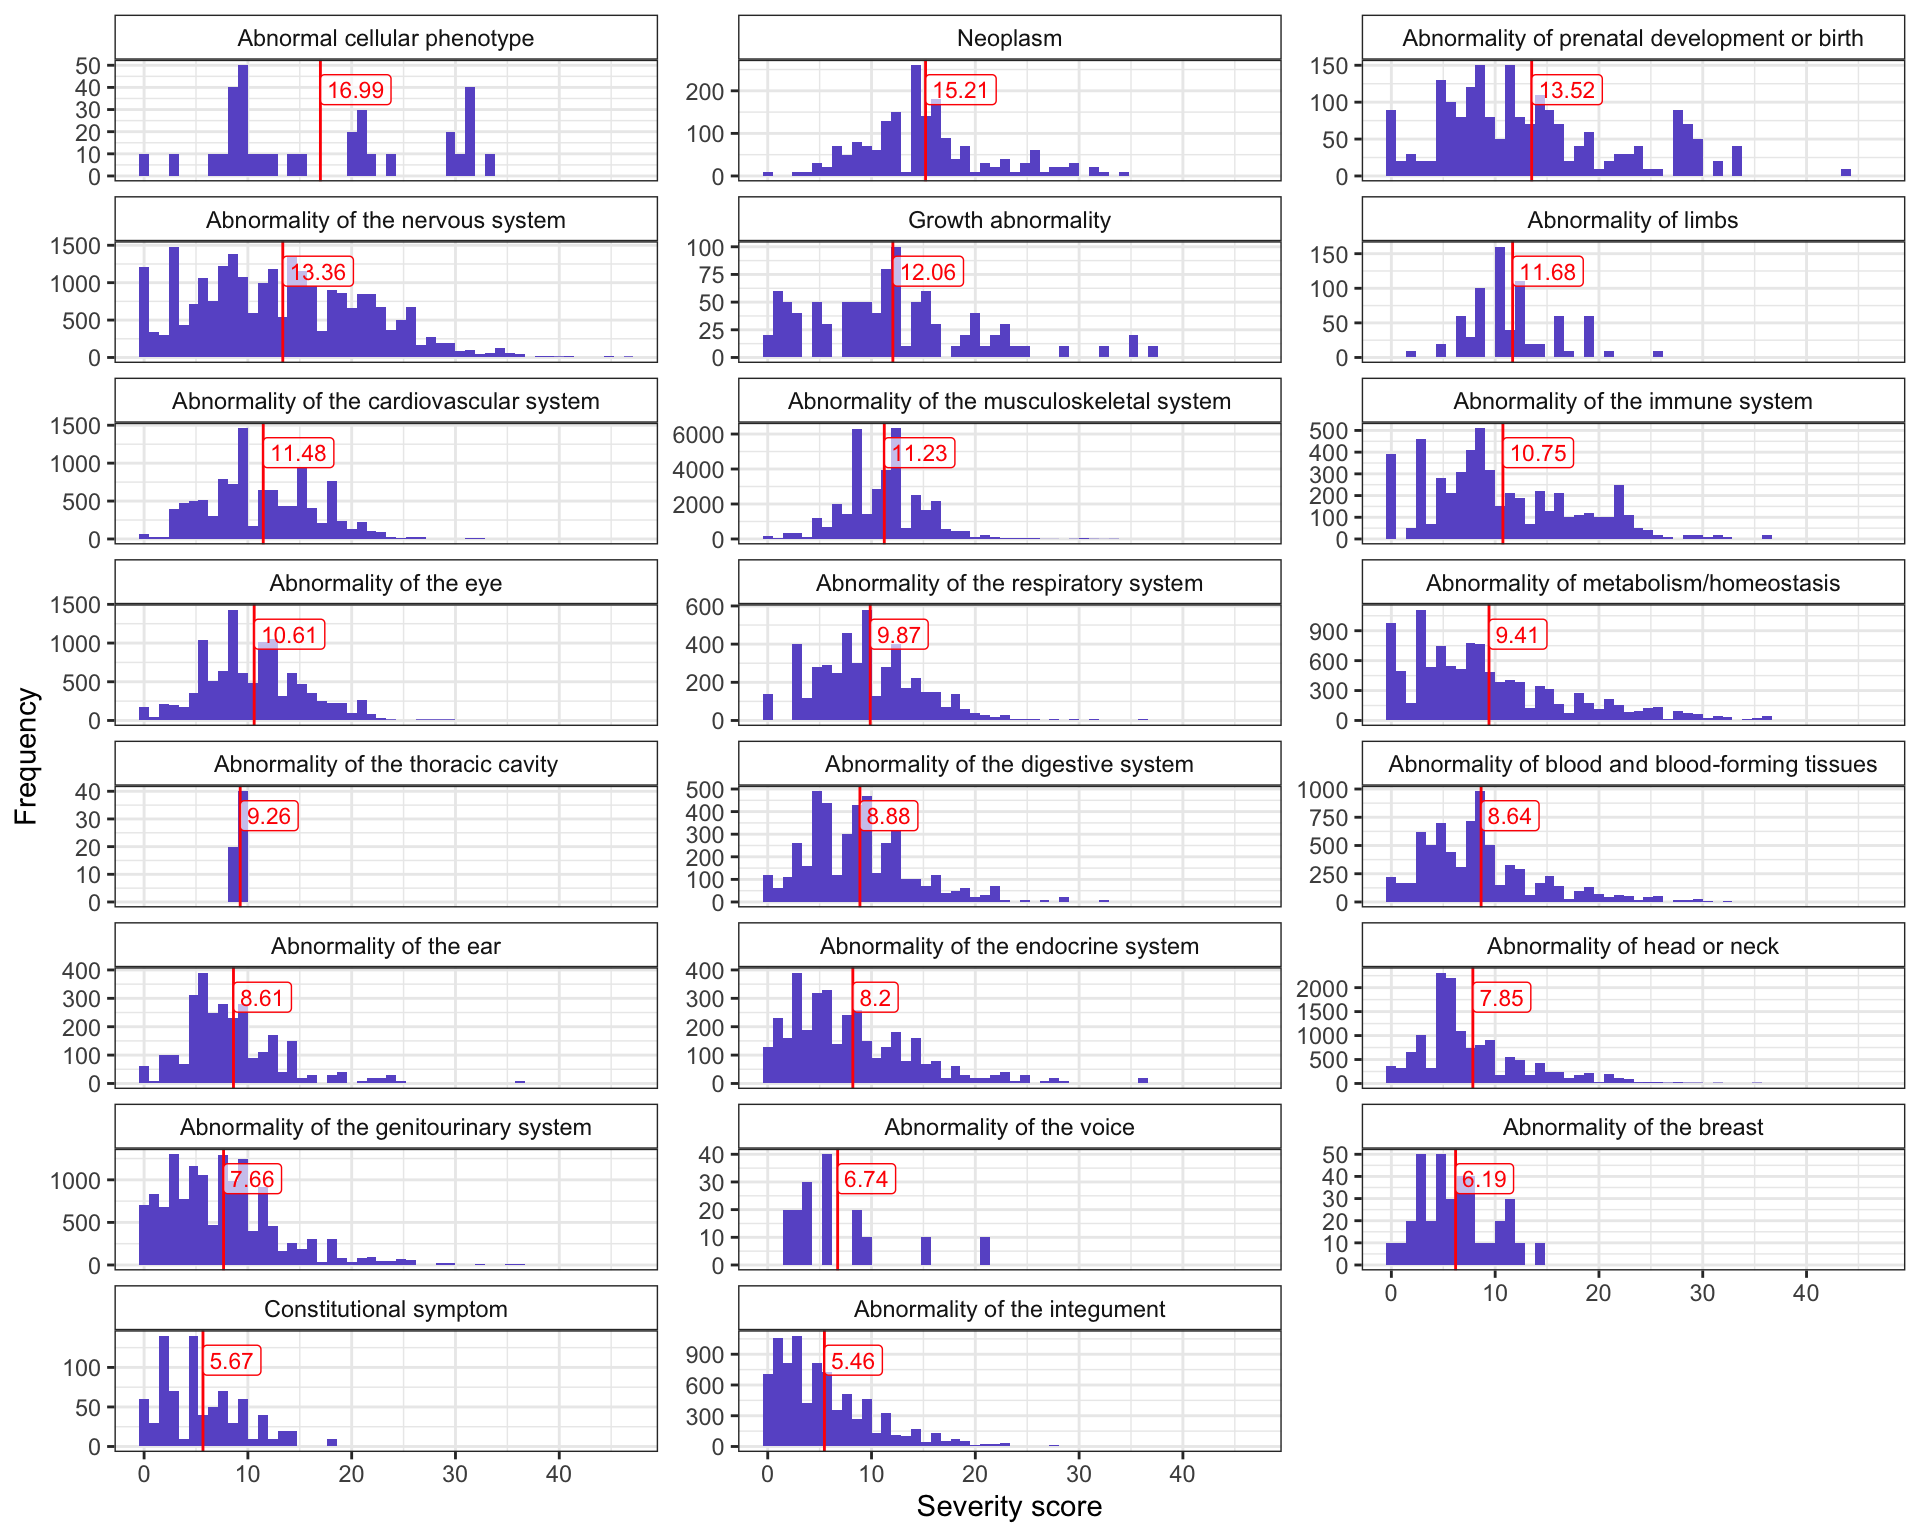

In [ ]:
gpt_annot_plot_out$gp3 +
  labs(x="Severity score") 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

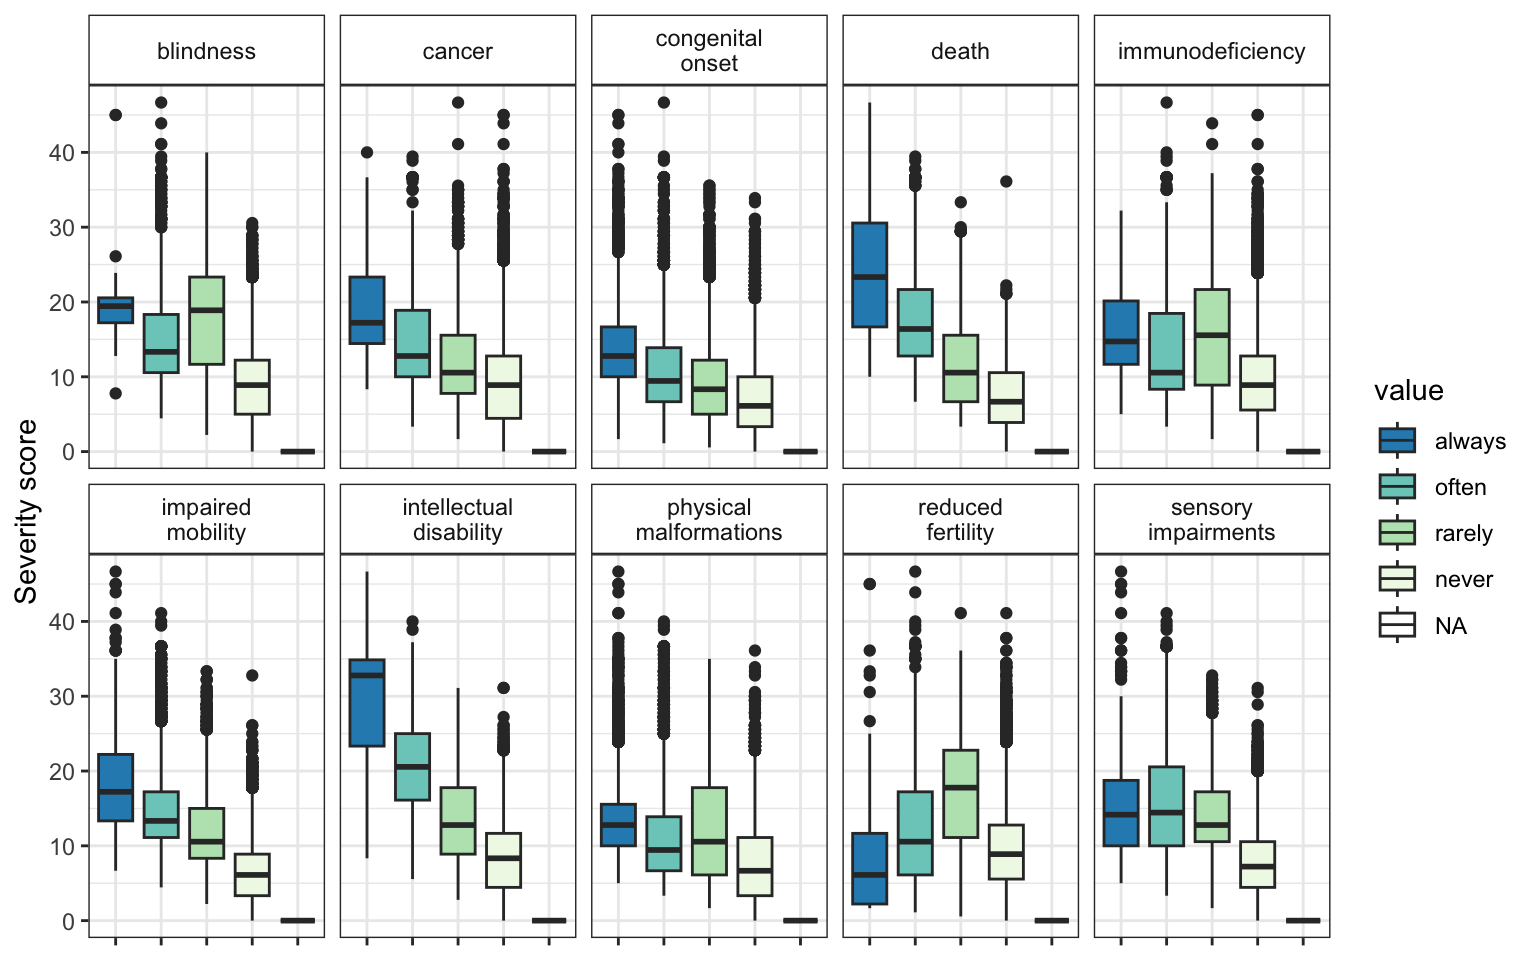

In [ ]:
gpt_annot_plot_out$gp2 +
  scale_fill_brewer(palette = "GnBu", direction = -1) +
  labs(y="Severity score") 

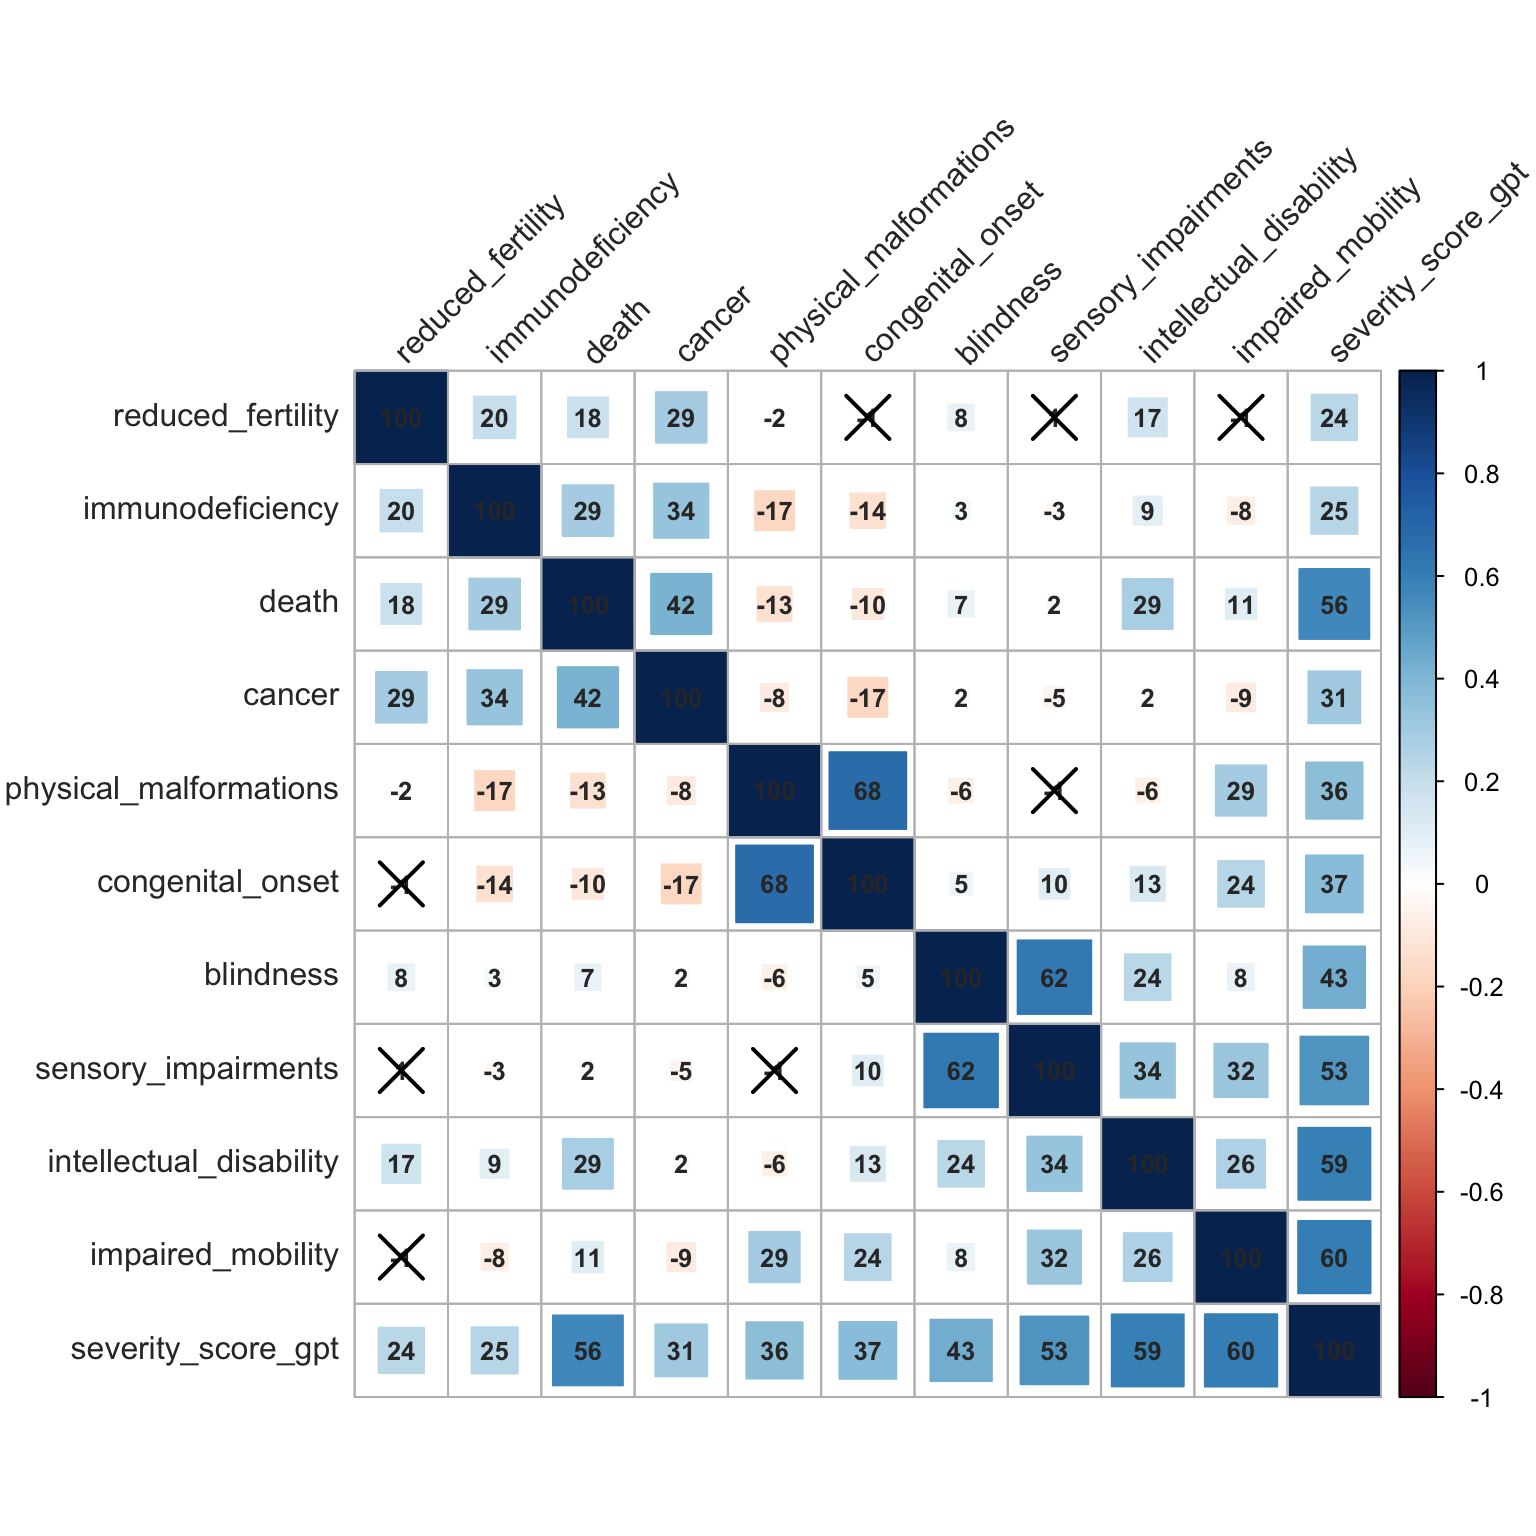

In [ ]:
diag(cor_metrics$P) <- 0
corrplot::corrplot(cor_metrics$r,
                   method = c("circle", "square", "ellipse", "number", "shade", "color", "pie")[2],
                   tl.srt = 45,
                   tl.col = "grey20",
                    # insig='blank',
                   addCoef.col ='grey20', number.cex = 0.8,
                   order="hclust",
                   addCoefasPercent=TRUE,
                   p.mat = cor_metrics$P)

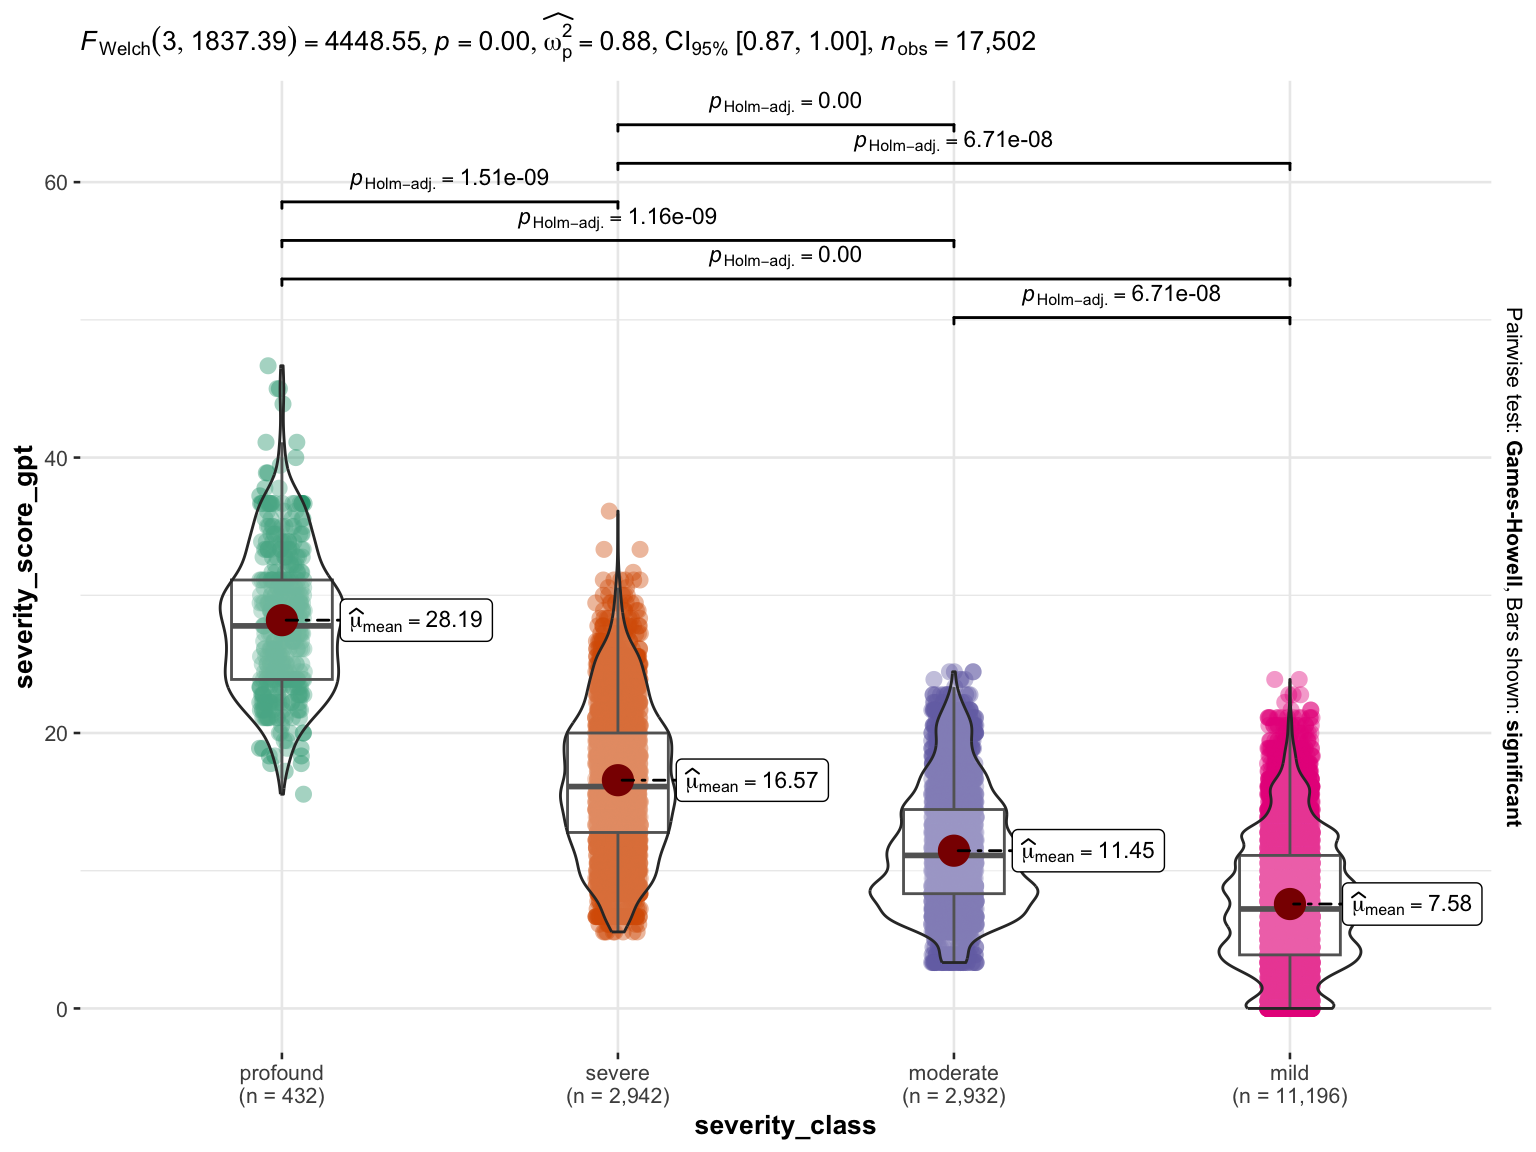

In [ ]:
fig_severity_class



### Supplementary Tables

In [ ]:
top_phenos_path <- here::here("data","top_phenos_annotations.csv.gz")
top_phenos <- data.table::rbindlist(plot_top_phenos_out$data)
data.table::setcolorder(top_phenos, "variable",before="value")
data.table::setcolorder(top_phenos, "hpo_name",after="hpo_id") 
top_phenos <- checks$annot[hpo_id %in% top_phenos$hpo_id]
data.table::fwrite(top_phenos, top_phenos_path)

[**Top phenotype annotations table**](https://github.com/neurogenomics/gpt_hpo_annotations/raw/master/data/top_phenos_annotations.csv.gz)

In [ ]:
annot_cols <- setdiff(grep("justification",names(gpt_annot), 
                       value = TRUE, invert = TRUE),
                       c("hpo_name","hpo_id","pheno_count"))
tbl_fas <- gpt_annot[hpo_name=='Fetal akinesia sequence',]|>
  data.table::melt.data.table(id.vars = c("hpo_name","hpo_id"), 
                              measure.vars = list(
                                Annotation=annot_cols,
                                Justification=grep("justification",names(gpt_annot), 
                                                   value = TRUE)
                                )
                              )
tbl_fas[,"Clinical characteristic":=stringr::str_to_sentence(gsub("_"," ",annot_cols))]
knitr::kable(
  as.data.frame(tbl_fas[,c("Clinical characteristic","Annotation","Justification")])
  )

  ----------------------------------------------------------------------------
  Clinical           Annotation     Justification
  characteristic                    
  ------------------ -------------- ------------------------------------------
  Intellectual       always         Fetal akinesia sequence typically results
  disability                        in severe neurodevelopmental impairment,
                                    including intellectual disability.

  Death              always         Fetal akinesia sequence is typically fatal
                                    in utero or shortly after birth.

  Impaired mobility  always         Fetal akinesia sequence results in severe
                                    physical impairment, including impaired
                                    mobility.

  Physical           always         Fetal akinesia sequence is associated with
  malformations                     multiple physical malformations.

  Blindness          often          Visual impairment is common in surviving
                                    individuals with fetal akinesia sequence
                                    due to neurodevelopmental impairment.

  Sensory            always         Fetal akinesia sequence typically results
  impairments                       in severe sensory impairment due to
                                    neurodevelopmental disruption.

  Immunodeficiency   rarely         While not a direct feature, some
                                    individuals with fetal akinesia sequence
                                    may have associated immune abnormalities.

  Cancer             never          Fetal akinesia sequence does not cause
                                    cancer.

  Reduced fertility  often          Given the severe physical impairments
                                    associated with fetal akinesia sequence,
                                    fertility is likely to be reduced in
                                    surviving individuals.

  Congenital onset   always         Fetal akinesia sequence is a congenital
                                    disorder.
  ----------------------------------------------------------------------------
